# Imports

In [3]:
import math
import os
import sys
import pandas as pd
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from statannot import add_stat_annotation

pd.options.mode.chained_assignment = None  # default='warn'
import multiprocessing
import parmap
import numpy as np
import collections
from tqdm import tqdm
import pandarallel
from pandarallel import pandarallel

pandarallel.initialize(nb_workers=20, progress_bar=True)
# tqdm.pandas()
from pprint import pprint
from scipy.stats import zscore
from scipy import stats

import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
import json
import matplotlib.ticker as mtick
from utils.utils import load_config_file

## YAML FILES CONFIG
yaml = load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/src/config.yaml")
exotic_files = yaml

import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


# Load files

## All corrected Genes

In [208]:
exotic_processed.loc[exotic_processed['MAP'] == 'ACSM5_20448590-20448689'].to_dict()

{'symbol': {227: 'ABI3'},
 'ensg': {227: 'ENSG00000108798'},
 'HGNC': {227: 29859},
 'Exon': {227: '47293893-47294042'},
 'Ratio_num': {227: 0.5},
 'mRNA_nb': {227: 1},
 'mRNA_nb_total': {227: 2},
 'MAP': {227: 'ABI3_47293893-47294042'},
 'mean_proportion': {227: 0.7347100000000001},
 'Adipose - Subcutaneous': {227: nan},
 'Adipose - Visceral (Omentum)': {227: nan},
 'Adrenal Gland': {227: nan},
 'Artery - Aorta': {227: nan},
 'Artery - Coronary': {227: nan},
 'Artery - Tibial': {227: nan},
 'Bladder': {227: nan},
 'Brain - Amygdala': {227: nan},
 'Brain - Anterior cingulate cortex (BA24)': {227: nan},
 'Brain - Caudate (basal ganglia)': {227: nan},
 'Brain - Cerebellar Hemisphere': {227: nan},
 'Brain - Cerebellum': {227: nan},
 'Brain - Cortex': {227: nan},
 'Brain - Frontal Cortex (BA9)': {227: nan},
 'Brain - Hippocampus': {227: nan},
 'Brain - Hypothalamus': {227: nan},
 'Brain - Nucleus accumbens (basal ganglia)': {227: nan},
 'Brain - Putamen (basal ganglia)': {227: nan},
 'Brai

In [209]:
exotic_processed.loc[exotic_processed['MAP'] == 'ACSM5_20448590-20448689'].to_dict()

{'symbol': {368: 'ACSM5'},
 'ensg': {368: 'ENSG00000183549'},
 'HGNC': {368: 26060},
 'Exon': {368: '20448590-20448689'},
 'Ratio_num': {368: 0.75},
 'mRNA_nb': {368: 3},
 'mRNA_nb_total': {368: 4},
 'MAP': {368: 'ACSM5_20448590-20448689'},
 'mean_proportion': {368: 0.56705},
 'Adipose - Subcutaneous': {368: nan},
 'Adipose - Visceral (Omentum)': {368: nan},
 'Adrenal Gland': {368: nan},
 'Artery - Aorta': {368: nan},
 'Artery - Coronary': {368: nan},
 'Artery - Tibial': {368: nan},
 'Bladder': {368: nan},
 'Brain - Amygdala': {368: nan},
 'Brain - Anterior cingulate cortex (BA24)': {368: nan},
 'Brain - Caudate (basal ganglia)': {368: nan},
 'Brain - Cerebellar Hemisphere': {368: nan},
 'Brain - Cerebellum': {368: nan},
 'Brain - Cortex': {368: nan},
 'Brain - Frontal Cortex (BA9)': {368: nan},
 'Brain - Hippocampus': {368: nan},
 'Brain - Hypothalamus': {368: nan},
 'Brain - Nucleus accumbens (basal ganglia)': {368: nan},
 'Brain - Putamen (basal ganglia)': {368: nan},
 'Brain - Spin

In [210]:
exotic_processed.loc[exotic_processed['MAP'] == 'ZNF257_22270781-22272244'].to_dict()

{'symbol': {23794: 'ZNF257'},
 'ensg': {23794: 'ENSG00000197134'},
 'HGNC': {23794: 13498},
 'Exon': {23794: '22270781-22272244'},
 'Ratio_num': {23794: 0.3333333333333333},
 'mRNA_nb': {23794: 1},
 'mRNA_nb_total': {23794: 3},
 'MAP': {23794: 'ZNF257_22270781-22272244'},
 'mean_proportion': {23794: 0.31128},
 'Adipose - Subcutaneous': {23794: nan},
 'Adipose - Visceral (Omentum)': {23794: nan},
 'Adrenal Gland': {23794: nan},
 'Artery - Aorta': {23794: nan},
 'Artery - Coronary': {23794: nan},
 'Artery - Tibial': {23794: nan},
 'Bladder': {23794: nan},
 'Brain - Amygdala': {23794: nan},
 'Brain - Anterior cingulate cortex (BA24)': {23794: nan},
 'Brain - Caudate (basal ganglia)': {23794: nan},
 'Brain - Cerebellar Hemisphere': {23794: nan},
 'Brain - Cerebellum': {23794: nan},
 'Brain - Cortex': {23794: nan},
 'Brain - Frontal Cortex (BA9)': {23794: nan},
 'Brain - Hippocampus': {23794: nan},
 'Brain - Hypothalamus': {23794: nan},
 'Brain - Nucleus accumbens (basal ganglia)': {23794: 

In [39]:
biomart = pd.read_csv('/gstock/EXOTIC/data/OTHERS/biomart_refseq_ensembl_hgnc.txt.gz', compression='gzip', sep='\t')

refseq_corrected_by_gtex = pd.read_parquet('/gstock/EXOTIC/data/GENOMICS/RefSeq_corrected_by_GTEx_lite.parquet')
refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['new_mRNA_nb_total'] == 1, 'Gene_type'] = 'Single Isoform'
refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['new_mRNA_nb_total'] > 1, 'Gene_type'] = 'Multi Isoform'
refseq_corrected_by_gtex['MAP'] = refseq_corrected_by_gtex.Gene + '_' + refseq_corrected_by_gtex.ranges.astype(str)
refseq_corrected_by_gtex.head()

dict_nm_enst = biomart[['RefSeq mRNA ID', 'Transcript stable ID']].dropna().set_index('RefSeq mRNA ID').to_dict()['Transcript stable ID']


def convert_refseq_nm_to_enst(r):
    def map_enst(nm):
        try: 
            return dict_nm_enst[nm]
        except KeyError:
            pass
    return [e for e in list(map(map_enst, r)) if e is not None]
        
            
tqdm.pandas()
refseq_corrected_by_gtex['ENST_exons'] = refseq_corrected_by_gtex['new_mRNA_exons'].progress_apply(convert_refseq_nm_to_enst)
refseq_corrected_by_gtex['ENST_exons_nb'] = refseq_corrected_by_gtex['ENST_exons'].apply(len)
refseq_corrected_by_gtex['Check_diff_NM_ENST_nb'] = refseq_corrected_by_gtex.apply(lambda r: True if r['ENST_exons_nb'] == r['new_mRNA_nb'] else False, axis=1)

refseq_corrected_by_gtex = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['ENST_exons_nb'] > 0]

refseq_corrected_by_gtex.head()


exotic_processed = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_modified_zscore.parquet')

exotic_processed_test = pd.merge(exotic_processed, refseq_corrected_by_gtex[['MAP', 'ENST_exons', 'new_mRNA_exons']], on='MAP')
exotic_processed_test.head()


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 176799/176799 [00:00<00:00, 222861.52it/s]


,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,Vagina,Whole Blood,EXOTIC_down,EXOTIC_bins_down,EXOTIC_tissues_down,EXOTIC_up,EXOTIC_bins_up,EXOTIC_tissues_up,ENST_exons,new_mRNA_exons
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,0.5,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
1,A2ML1,ENSG00000166535,23336,8975778-8975961,0.5,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,0.5,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
2,A2ML1,ENSG00000166535,23336,8976316-8976478,0.5,1,2,A2ML1_8976316-8976478,0.69514,0.578349,...,0.5,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
3,A2ML1,ENSG00000166535,23336,8982323-8982375,0.5,1,2,A2ML1_8982323-8982375,0.69514,0.578349,...,0.5,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
4,A2ML1,ENSG00000166535,23336,8987258-8987278,0.5,1,2,A2ML1_8987258-8987278,0.69514,0.578349,...,0.5,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]


# QTL Mapping

### Mapping of all sQTLs over EXOTIC genes with the same tissue

In [30]:
sqtlseeker_listdir

['Adipose - Subcutaneous',
 'Adipose - Visceral (Omentum)',
 'Adrenal Gland',
 'Artery - Aorta',
 'Artery - Coronary',
 'Artery - Tibial',
 'Brain - Amygdala',
 'Brain - Anterior cingulate cortex (BA24)',
 'Brain - Caudate (basal ganglia)',
 'Brain - Cerebellar Hemisphere',
 'Brain - Cerebellum',
 'Brain - Cortex',
 'Brain - Frontal Cortex (BA9)',
 'Brain - Hippocampus',
 'Brain - Hypothalamus',
 'Brain - Nucleus accumbens (basal ganglia)',
 'Brain - Putamen (basal ganglia)',
 'Brain - Spinal cord (cervical c-1)',
 'Brain - Substantia nigra',
 'Breast - Mammary Tissue',
 'Cells - Cultured fibroblasts',
 'Cells - EBV-transformed lymphocytes',
 'Colon - Sigmoid',
 'Colon - Transverse',
 'Esophagus - Gastroesophageal Junction',
 'Esophagus - Mucosa',
 'Esophagus - Muscularis',
 'Heart - Atrial Appendage',
 'Heart - Left Ventricle',
 'Kidney - Cortex',
 'Liver',
 'Lung',
 'Minor Salivary Gland',
 'Muscle - Skeletal',
 'Nerve - Tibial',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate',
 'Sk

In [40]:
sqtlseeker_dir = '/gstock/biolo_datasets/QTL/sqlseeker-2/sQTLs.GTEx.V8.RSEM/'
sqtlseeker_listdir = sorted([d for d in os.listdir(sqtlseeker_dir) if 'parquet' not in d])

def mp_sqtl(tissue, l_df):
    sqtlseeker_tmp = pd.read_csv(sqtlseeker_dir + tissue + '/sqtls-0.05fdr.permuted.tsv.gz', compression='gzip', sep='\t')
    sqtlseeker_tmp = sqtlseeker_tmp.melt(id_vars=[c for c in sqtlseeker_tmp.columns if 'tr.' not in c], value_vars=['tr.first', 'tr.second'], var_name='tr_type', value_name='ENST')
    sqtlseeker_tmp.ENST = sqtlseeker_tmp.ENST.apply(lambda r: r.split('.')[0])
    sqtlseeker_tmp['Tissue'] = tissue
    sqtlseeker_tmp['gene_id'] = sqtlseeker_tmp['geneId'].apply(lambda r: r.split('.')[0])
    merge = pd.merge(exotic_processed_test.explode('ENST_exons'), sqtlseeker_tmp, left_on='ENST_exons', right_on='ENST')
    l_df.append(merge)


m = multiprocessing.Manager()
l_df = m.list()
# for tissue in sqtlseeker_listdir:
parmap.starmap(mp_sqtl, list(zip(sqtlseeker_listdir)), l_df, pm_pbar=True)

exotic_sqtl = pd.concat(list(l_df)).sort_values(by=['symbol'])
# exotic_sqtl = exotic_sqtl.drop(['EXOTIC_check_pext_min', 'EXOTIC_check_pext_max'], axis=1)
# exotic_sqtl['EXOTIC_tissues_max'] = exotic_sqtl['EXOTIC_tissues_max'].astype(str)
# exotic_sqtl['EXOTIC_tissues_min'] = exotic_sqtl['EXOTIC_tissues_min'].astype(str)
# exotic_sqtl['Check_tissues_max'] = exotic_sqtl.apply(lambda r: True if r['Tissue'] in r['EXOTIC_tissues_max'] else False, axis=1)
# exotic_sqtl['Check_tissues_min'] = exotic_sqtl.apply(lambda r: True if r['Tissue'] in r['EXOTIC_tissues_min'] else False, axis=1)
exotic_sqtl.to_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore.parquet')
exotic_sqtl.head()


100%|██████████| 49/49 [00:14<00:00,  3.46it/s]


,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perm,pv.emp.perm
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,1000.0,0.000999
10,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.710608,10100,0.486486,0.837153,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
11,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,2.392523,10100,0.096129,0.525904,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
12,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.279041,10100,0.742105,0.928770,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
13,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,1.698239,10100,0.185922,0.644152,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999


In [18]:
exotic_sqtl[['ensg', 'snpId']].drop_duplicates()

,ensg,snpId
3,ENSG00000166535,12_8831184_C_A_b38
32,ENSG00000166535,12_8862723_TG_T_b38
11,ENSG00000166535,12_8857224_G_A_b38
10,ENSG00000166535,12_8877262_G_A_b38
9,ENSG00000166535,12_8877216_T_C_b38
...,...,...
207114,ENSG00000070476,3_126473238_C_G_b38
207115,ENSG00000070476,3_126451852_T_G_b38
207116,ENSG00000070476,3_126460649_G_A_b38
38908,ENSG00000070476,3_126442041_CATTA_C_b38


In [213]:
exotic_sqtl[['ensg', 'snpId', 'Tissue']].drop_duplicates()['Tissue'].value_counts()

Adipose - Subcutaneous                       32882
Nerve - Tibial                               32700
Thyroid                                      32473
Skin - Sun Exposed (Lower leg)               31597
Artery - Tibial                              29059
Skin - Not Sun Exposed (Suprapubic)          27937
Muscle - Skeletal                            27346
Lung                                         27271
Esophagus - Muscularis                       27048
Testis                                       26876
Adipose - Visceral (Omentum)                 25772
Esophagus - Mucosa                           25236
Cells - Cultured fibroblasts                 25015
Breast - Mammary Tissue                      23597
Artery - Aorta                               22783
Esophagus - Gastroesophageal Junction        20673
Colon - Sigmoid                              20210
Colon - Transverse                           18967
Heart - Atrial Appendage                     17939
Pituitary                      

In [16]:
exotic_sqtl.EXOTIC_tissues_up
# exotic_sqtl.loc[exotic_sqtl['Check_tissues_max'] == True]
# exotic_sqtl[['ensg', 'snpId', 'Tissue']].drop_duplicates()['Tissue'].value_counts()

3         [Adipose - Subcutaneous, Adipose - Visceral (O...
32                                                 [Uterus]
11                                                 [Uterus]
10                                                 [Uterus]
9                                                  [Uterus]
                                ...                        
207071                                  [Muscle - Skeletal]
207072                                  [Muscle - Skeletal]
207073                                  [Muscle - Skeletal]
207075                                  [Muscle - Skeletal]
207179                                    [Artery - Tibial]
Name: EXOTIC_tissues_up, Length: 5048374, dtype: object

In [27]:
sqtlseeker_dir = '/gstock/biolo_datasets/QTL/sqlseeker-2/sQTLs.GTEx.V8.RSEM/'
tissue = 'Testis'
sqtlseeker_tmp = pd.read_csv(sqtlseeker_dir + tissue + '/sqtls-0.05fdr.permuted.tsv.gz', compression='gzip', sep='\t')
sqtlseeker_tmp = sqtlseeker_tmp.melt(id_vars=[c for c in sqtlseeker_tmp.columns if 'tr.' not in c], value_vars=['tr.first', 'tr.second'], var_name='tr_type', value_name='ENST')
sqtlseeker_tmp.ENST = sqtlseeker_tmp.ENST.apply(lambda r: r.split('.')[0])
sqtlseeker_tmp


,geneId,variants.cis,LD,best.snp,best.nominal.pv,shape1,shape2,nb.perm,pv.emp.perm,pv.emp.beta,...,nb.groups,md,info,pv,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST
0,ENSG00000000460.16,388,0.047088,1_169833737_C_T_b38,6.091186e-07,0.852415,68.713804,1000,0.000999,1.956379e-04,...,3,0.078365,"0,31,134,157",6.091186e-07,2.786734,10100,0.064251,0.449160,tr.first,ENST00000359326
1,ENSG00000000460.16,388,0.047088,1_169833737_C_T_b38,6.091186e-07,0.852415,68.713804,1000,0.000999,1.956379e-04,...,3,0.082246,"0,52,159,111",2.653543e-06,2.582973,10100,0.077814,0.479461,tr.first,ENST00000359326
2,ENSG00000000460.16,388,0.047088,1_169833737_C_T_b38,6.091186e-07,0.852415,68.713804,1000,0.000999,1.956379e-04,...,3,0.082246,"0,52,159,111",2.653543e-06,2.582973,10100,0.077814,0.479461,tr.first,ENST00000359326
3,ENSG00000000460.16,388,0.047088,1_169833737_C_T_b38,6.091186e-07,0.852415,68.713804,1000,0.000999,1.956379e-04,...,3,0.082246,"0,52,159,111",2.653543e-06,2.582973,10100,0.077814,0.479461,tr.first,ENST00000359326
4,ENSG00000000460.16,388,0.047088,1_169833737_C_T_b38,6.091186e-07,0.852415,68.713804,1000,0.000999,1.956379e-04,...,3,0.082246,"0,52,159,111",2.653543e-06,2.582973,10100,0.077814,0.479461,tr.first,ENST00000359326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222113,ENSG00000283516.1,33,0.047022,16_8882758_C_T_b38,1.713540e-11,0.932751,11.892070,1000,0.000999,9.363155e-10,...,3,0.093977,"0,119,148,40",3.083353e-07,2.378445,10100,0.094644,0.510400,tr.second,ENST00000637237
222114,ENSG00000283516.1,33,0.047022,16_8882758_C_T_b38,1.713540e-11,0.932751,11.892070,1000,0.000999,9.363155e-10,...,3,0.090766,"0,46,143,118",3.676301e-07,2.036965,10100,0.132561,0.567444,tr.second,ENST00000637237
222115,ENSG00000283516.1,33,0.047022,16_8882758_C_T_b38,1.713540e-11,0.932751,11.892070,1000,0.000999,9.363155e-10,...,3,0.085385,"0,94,156,57",2.537894e-06,2.787537,10100,0.065736,0.452728,tr.second,ENST00000637237
222116,ENSG00000283516.1,33,0.047022,16_8882758_C_T_b38,1.713540e-11,0.932751,11.892070,1000,0.000999,9.363155e-10,...,3,0.077580,"0,78,161,68",6.927418e-05,0.249896,10100,0.778339,0.939519,tr.second,ENST00000637237


In [28]:
test_merge = pd.merge(exotic_processed_test.explode('ENST_exons'), sqtlseeker_tmp, left_on='ENST_exons', right_on='ENST')
test_merge =  test_merge[['MAP', 'mean_proportion', 'EXOTIC_min', 'EXOTIC_max', 'tr_type', 'ENST', 'EXOTIC_tissues_corrected_min', 'EXOTIC_tissues_corrected_max']]
test_merge['EXOTIC_tissues_corrected_max'] = test_merge['EXOTIC_tissues_corrected_max'].astype(str)
test_merge['EXOTIC_tissues_corrected_min'] = test_merge['EXOTIC_tissues_corrected_min'].astype(str)

# COMPUTE BINS
r = np.arange(0.5,1.05,0.05)
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'max'

# COMPUTE BINS COLUMNS
test_merge["EXOTIC_bins_{}".format(min_max)] = pd.cut(test_merge["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

# COMPUTE BINS
r = np.arange(0,0.55,0.05)
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'min'

# COMPUTE BINS COLUMNS
test_merge["EXOTIC_bins_{}".format(min_max)] = pd.cut(test_merge["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)


test_merge.loc[test_merge['EXOTIC_tissues_corrected_max'].str.contains('Muscle - Skeletal')]

,MAP,mean_proportion,EXOTIC_min,EXOTIC_max,tr_type,ENST,EXOTIC_tissues_corrected_min,EXOTIC_tissues_corrected_max,EXOTIC_bins_max,EXOTIC_bins_min
0,A2ML1_8975248-8975309,0.69514,0.153430,0.731334,tr.second,ENST00000299698,['Brain - Cerebellar Hemisphere'],['Adipose - Subcutaneous' 'Adipose - Visceral ...,0.7 - 0.75,0.15 - 0.2
1,A2ML1_8975248-8975309,0.69514,0.153430,0.731334,tr.second,ENST00000299698,['Brain - Cerebellar Hemisphere'],['Adipose - Subcutaneous' 'Adipose - Visceral ...,0.7 - 0.75,0.15 - 0.2
2,A2ML1_8975778-8975961,0.69514,0.153430,0.731334,tr.second,ENST00000299698,['Brain - Cerebellar Hemisphere'],['Adipose - Subcutaneous' 'Adipose - Visceral ...,0.7 - 0.75,0.15 - 0.2
3,A2ML1_8975778-8975961,0.69514,0.153430,0.731334,tr.second,ENST00000299698,['Brain - Cerebellar Hemisphere'],['Adipose - Subcutaneous' 'Adipose - Visceral ...,0.7 - 0.75,0.15 - 0.2
4,A2ML1_8976316-8976478,0.69514,0.153430,0.731334,tr.second,ENST00000299698,['Brain - Cerebellar Hemisphere'],['Adipose - Subcutaneous' 'Adipose - Visceral ...,0.7 - 0.75,0.15 - 0.2
...,...,...,...,...,...,...,...,...,...,...
215121,ZNF746_149171475-149172571,0.88481,0.116934,0.950051,tr.second,ENST00000340622,['Lung'],['Muscle - Skeletal'],0.95 - 1.0,0.1 - 0.15
215122,ZNF746_149171475-149172571,0.88481,0.116934,0.950051,tr.second,ENST00000340622,['Lung'],['Muscle - Skeletal'],0.95 - 1.0,0.1 - 0.15
215211,ZNF763_12076024-12076026,0.86301,0.086553,0.956585,tr.second,ENST00000343949,['Small Intestine - Terminal Ileum'],['Muscle - Skeletal'],0.95 - 1.0,0.05 - 0.1
215212,ZNF763_12076024-12076026,0.86301,0.086553,0.956585,tr.second,ENST00000343949,['Small Intestine - Terminal Ileum'],['Muscle - Skeletal'],0.95 - 1.0,0.05 - 0.1


In [15]:
test_merge.tr_type.value_counts()

tr.second    134451
tr.first      60900
Name: tr_type, dtype: int64

In [29]:
test_merge[['tr_type', 'ENST']].groupby(['tr_type']).nunique()

,ENST
tr_type,
tr.first,509
tr.second,936


In [13]:
test_merge.loc[test_merge['EXOTIC_tissues_corrected_max'].str.contains('Muscle - Skeletal'), ['tr_type', 'EXOTIC_bins_max']].value_counts().sort_index()

tr_type    EXOTIC_bins_max
tr.first   0.5 - 0.55           409
           0.55 - 0.6            46
           0.6 - 0.65            11
           0.7 - 0.75           193
           0.75 - 0.8            21
           0.8 - 0.85           444
           0.85 - 0.9           835
           0.9 - 0.95          2141
           0.95 - 1.0          2706
tr.second  0.5 - 0.55            91
           0.55 - 0.6            58
           0.6 - 0.65            19
           0.65 - 0.7            23
           0.7 - 0.75           221
           0.75 - 0.8           392
           0.8 - 0.85          1113
           0.85 - 0.9          2361
           0.9 - 0.95         12943
           0.95 - 1.0          7488
dtype: int64

In [14]:
test_merge.loc[test_merge['EXOTIC_tissues_corrected_min'].str.contains('Muscle - Skeletal'), ['tr_type', 'EXOTIC_bins_min']].value_counts().sort_index()

tr_type    EXOTIC_bins_min
tr.first   0.0 - 0.05          510
           0.05 - 0.1          415
           0.1 - 0.15         1572
           0.15 - 0.2            6
           0.2 - 0.25            7
           0.25 - 0.3            2
           0.3 - 0.35           59
           0.35 - 0.4           20
           0.4 - 0.45          145
           0.45 - 0.5           19
tr.second  0.0 - 0.05         4473
           0.05 - 0.1         1098
           0.1 - 0.15          309
           0.15 - 0.2           61
           0.2 - 0.25          213
           0.25 - 0.3           94
           0.3 - 0.35           21
           0.35 - 0.4          267
           0.4 - 0.45          116
           0.45 - 0.5          190
dtype: int64

In [ ]:
sqtlseeker_dir = '/gstock/biolo_datasets/QTL/sqlseeker-2/sQTLs.GTEx.V8.RSEM/'
sqtlseeker_listdir = sorted([d for d in os.listdir(sqtlseeker_dir) if 'parquet' not in d])

def mp_sqtl(tissue, l_df):
    sqtlseeker_tmp = pd.read_csv(sqtlseeker_dir + tissue + '/sqtls-0.05fdr.permuted.tsv.gz', compression='gzip', sep='\t')
    sqtlseeker_tmp['Tissue'] = tissue
    sqtlseeker_tmp['gene_id'] = sqtlseeker_tmp['geneId'].apply(lambda r: r.split('.')[0])
    merge = pd.merge(refseq_corrected_by_gtex, sqtlseeker_tmp, right_on='gene_id', left_on='Transcript stable ID')
    l_df.append(merge)


m = multiprocessing.Manager()
l_df = m.list()
# for tissue in sqtlseeker_listdir:
parmap.starmap(mp_sqtl, list(zip(sqtlseeker_listdir)), l_df, pm_pbar=True)

concat_df_sqtlseeker_dir_all_genes_corrected = pd.concat(list(l_df)).sort_values(by=['gene_id'])
concat_df_sqtlseeker_dir_all_genes_corrected = concat_df_sqtlseeker_dir_all_genes_corrected.loc[concat_df_sqtlseeker_dir_all_genes_corrected['Gene_type'] == 'Multi Isoform']
concat_df_sqtlseeker_dir_all_genes_corrected.to_parquet('/gstock/EXOTIC/data/QTL/sQTL_all_genes_corrected.parquet')
concat_df_sqtlseeker_dir_all_genes_corrected.head()


In [ ]:
concat_df_sqtlseeker_dir_all_genes_corrected = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_all_genes_corrected.parquet')

## Compute EXOTIC-MIN & MAX

In [214]:
# ITERATE OVER MIN & MAX 
for min_max_func in [min, max]:
    r = np.arange(0.5,1.05,0.05)
    min_max_str = min_max_func.__name__
    min_max = 'down' if min_max_str == 'min' else 'up'
    print(min_max)
    
    # EXPLODE ON MIN / MAX TISSUES ASSOCIATED COLUMN
    exotic_sqtl_lite = exotic_sqtl.explode('EXOTIC_tissues_{}'.format(min_max))
    exotic_sqtl_lite = exotic_sqtl_lite.loc[exotic_sqtl_lite['Tissue'] == exotic_sqtl_lite['EXOTIC_tissues_{}'.format(min_max)]]
    print(exotic_sqtl_lite.shape)

#     # MERGE WITH ALL VARIANTS / TISSUE-SPECIFIC 
#     merge_exotic_sqtl = pd.merge(exotic_processed_lite, concat_df_sqtlseeker_dir_all_genes_corrected, left_on=['ensg'], right_on=['gene_id'])
#     merge_exotic_sqtl_on_tissues = pd.merge(exotic_processed_lite, concat_df_sqtlseeker_dir_all_genes_corrected, left_on=['ensg', 'EXOTIC_tissues_corrected_{}'.format(min_max)], right_on=['gene_id', 'Tissue'])
    
#     # COMPUTE BINS
#     bins = r
#     labels = bins.copy()
#     labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
    
#     # COMPUTE BINS COLUMNS
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
#     merge_exotic_sqtl_on_tissues["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl_on_tissues['EXOTIC_{}'.format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
    
    # WRITE FILES
#     merge_exotic_sqtl.to_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format(min_max))    
    exotic_sqtl_lite.to_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format(min_max))   

down
(83541, 99)
up
(132258, 99)


In [6]:
# merge_exotic_sqtl_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('min'))
# merge_exotic_sqtl_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('max'))    

merge_exotic_sqtl_on_tissues_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format("down"))   

merge_exotic_sqtl_on_tissues_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format("up"))  

In [120]:
# COMPUTE BINS
bins = np.arange(0.5,1.05,0.05)
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]


merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore.parquet').reset_index(drop=True)
merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)


merge_exotic_sqtl_on_tissues_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format("up"))  
merge_exotic_sqtl_on_tissues_max["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl_on_tissues_max['EXOTIC_{}'.format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)


In [95]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25)))

79.5

In [97]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25) - (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25)))

-44.5

In [ ]:
tmp = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
outliers_total = tmp.loc[tmp >= cutoff].index.tolist()

tmp = merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
outliers_ts = tmp.loc[tmp >= cutoff].index.tolist()

concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']

concat_count.columns = ['EXOTIC_bins_up', 'Total', 'TS', 'Ratio']
concat_count['EXOTIC_bin_start'] = concat_count['EXOTIC_bins_up'].apply(lambda r: r.split(' - ')[1])
concat_count.to_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-up_Rdata.xlsx')
concat_count

In [38]:
merge_exotic_sqtl

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perm,pv.emp.perm
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,1000.0,0.000999
1,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.710608,10100,0.486486,0.837153,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
2,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,2.392523,10100,0.096129,0.525904,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
3,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.279041,10100,0.742105,0.928770,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
4,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,1.698239,10100,0.185922,0.644152,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048975,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048976,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048977,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048978,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.029523,10100,0.355311,0.760261,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999


In [39]:
tmp = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
outliers_total = tmp.loc[tmp >= cutoff].index.tolist()
tmp
tmp = merge_exotic_sqtl_on_tissues_min[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl_on_tissues_min[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
outliers_ts = tmp.loc[tmp >= cutoff].index.tolist()

outliers_ts, outliers_total = list(), list()

concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'MAP',  'EXOTIC_bins_down', 'Tissue']].drop_duplicates()['EXOTIC_bins_down'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_min.loc[~merge_exotic_sqtl_on_tissues_min['MAP'].isin(outliers_ts)][['snpId', 'MAP',  'EXOTIC_bins_down', 'Tissue']].drop_duplicates()['EXOTIC_bins_down'].value_counts().sort_index(),
], axis=1)
concat_count
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
concat_count = concat_count.reset_index()
concat_count.columns = ['EXOTIC_bins_down', 'Total', 'TS', 'Ratio']
concat_count['EXOTIC_bin_start'] = concat_count['EXOTIC_bins_down'].apply(lambda r: r.split(' - ')[1])
concat_count.to_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-down_Rdata.xlsx')
concat_count

,EXOTIC_bins_down,Total,TS,Ratio,EXOTIC_bin_start
0,0.5 - 0.55,560125,8611,0.015373,0.55
1,0.55 - 0.6,815810,12601,0.015446,0.6
2,0.6 - 0.65,541910,7863,0.014510,0.65
3,0.65 - 0.7,215116,5049,0.023471,0.7
4,0.7 - 0.75,161085,2590,0.016078,0.75
5,0.75 - 0.8,212565,1380,0.006492,0.8
6,0.8 - 0.85,67974,1789,0.026319,0.85
7,0.85 - 0.9,35004,929,0.026540,0.9
8,0.9 - 0.95,62352,671,0.010761,0.95
9,0.95 - 1.0,35017,398,0.011366,1.0


In [188]:
tmp = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)

print(cutoff)
outliers_total = tmp.loc[tmp >= cutoff].index.tolist()
outliers_total[:10]

280.3899999999994


['WDPCP_63714581-63714628',
 'WDPCP_63380049-63380080',
 'WDPCP_63815331-63815405',
 'WDPCP_63349141-63349191',
 'WDPCP_63666891-63667005',
 'WDPCP_63712051-63712121',
 'WDPCP_63540383-63540446',
 'WDPCP_63486442-63486544',
 'WDPCP_63401805-63401967',
 'WDPCP_63713676-63713720']

In [189]:
tmp = merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
print(cutoff)
outliers_ts = tmp.loc[tmp >= cutoff].index.tolist()
print(cutoff)
outliers_ts[:10]

271.0
271.0


['MAPT_44049225-44049311',
 'WDPCP_63666891-63667005',
 'WDPCP_63714581-63714628',
 'WDPCP_63712051-63712121',
 'WDPCP_63815331-63815405',
 'WDPCP_63711738-63711797',
 'WDPCP_63719990-63720074',
 'WDPCP_63713676-63713720',
 'NME7_169293631-169293633',
 'TBCK_107229925-107230117']

In [64]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'EXOTIC_bins_up', 'snpId']].drop_duplicates().groupby(['EXOTIC_bins_up', 'MAP',]).count().reset_index().groupby('EXOTIC_bins_up').describe()

snpId                                                       
                count       mean         std  min    25%   50%    75%    max
EXOTIC_bins_up                                                              
0.5 - 0.55      602.0  22.078073   32.939347  1.0   2.00  10.0  31.00  294.0
0.55 - 0.6      616.0  33.412338   80.769684  1.0   2.00  12.0  35.00  694.0
0.6 - 0.65      406.0  23.334975   38.205178  1.0   1.00   9.0  26.75  197.0
0.65 - 0.7      263.0  28.178707   33.819153  1.0   7.50  10.0  56.00  207.0
0.7 - 0.75      143.0  68.629371  100.309288  1.0   2.00  11.0  80.50  341.0
0.75 - 0.8       61.0  22.901639   64.175204  1.0   4.00   5.0  19.00  476.0
0.8 - 0.85       29.0  49.344828  133.929959  1.0   3.00   8.0  36.00  717.0
0.85 - 0.9       32.0  20.312500   15.693511  1.0   7.75  14.0  30.25   55.0
0.9 - 0.95       12.0  30.083333   56.450233  2.0   5.00   8.0  15.00  195.0
0.95 - 1.0       13.0  51.769231   40.120971  1.0  12.00  87.0  87.00   87.0

In [55]:
merge_exotic_sqtl[['MAP', 'EXOTIC_bins_up', 'snpId']].drop_duplicates().groupby(['MAP', 'EXOTIC_bins_up']).count()['snpId'].describe()

count    12368.000000
mean        42.968548
std         64.945445
min          1.000000
25%          3.000000
50%         19.000000
75%         56.000000
max        901.000000
Name: snpId, dtype: float64

In [49]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()

0.5 - 0.55    602
0.55 - 0.6    616
0.6 - 0.65    406
0.65 - 0.7    263
0.7 - 0.75    143
0.75 - 0.8     61
0.8 - 0.85     29
0.85 - 0.9     32
0.9 - 0.95     12
0.95 - 1.0     13
Name: EXOTIC_bins_up, dtype: int64

In [135]:
merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['MAP'] == 'P4HA2_131543401-131543577', 'EXOTIC_bins_up'].unique()

['0.7 - 0.75']
Categories (1, object): ['0.7 - 0.75']

In [47]:
merge_exotic_sqtl_on_tissues_max[['snpId', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()

0.5 - 0.55    8445
0.55 - 0.6    7129
0.6 - 0.65    4581
0.65 - 0.7    2533
0.7 - 0.75    2277
0.75 - 0.8    1095
0.8 - 0.85    1204
0.85 - 0.9     342
0.9 - 0.95     343
0.95 - 1.0     138
Name: EXOTIC_bins_up, dtype: int64

In [48]:
merge_exotic_sqtl[['snpId', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()

0.5 - 0.55    53462
0.55 - 0.6    51284
0.6 - 0.65    33574
0.65 - 0.7    20022
0.7 - 0.75    12665
0.75 - 0.8     7475
0.8 - 0.85     5720
0.85 - 0.9     4454
0.9 - 0.95     2800
0.95 - 1.0     1381
Name: EXOTIC_bins_up, dtype: int64

In [154]:
merge_exotic_sqtl_on_tissues_max.MAP.nunique()

2177

In [155]:
merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)].MAP.nunique()

34

In [156]:
len(outliers_ts)

2143

In [186]:
merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_bins_up'] == '0.7 - 0.75'][['MAP', 'snpId']].drop_duplicates()['MAP'].value_counts().head(50)

TBCK_107229925-107230117     341
TBCK_107216251-107216323     341
TTC3_38510934-38511014       271
TTC3_38460133-38460175       271
TTC3_38504982-38505066       271
TTC3_38507680-38507814       271
TTC3_38462533-38462586       271
TTC3_38519781-38519903       271
TTC3_38496919-38497042       271
TTC3_38480692-38480746       271
TTC3_38461099-38461186       271
TTC3_38463593-38463713       271
TTC3_38459558-38459701       271
TTC3_38460496-38460646       271
TTC3_38467650-38467744       271
TTC3_38512861-38512973       271
TTC3_38466305-38466390       271
TTC3_38516825-38516945       271
TTC3_38498380-38498443       271
TTC3_38495283-38495328       271
TTC3_38501303-38501363       271
TTC3_38523120-38523184       271
TTC3_38468881-38468943       271
TBCK_107173140-107173164     207
P4HA2_131543401-131543577    154
PBX3_128728110-128728202     147
PBX3_128724381-128724493     147
ST7L_113143416-113143470     146
ST7L_113161531-113161735     146
ST7L_113153463-113153625     146
ST7L_11308

             Total     TS     Ratio
0.5 - 0.55  559696  22741  0.040631
0.55 - 0.6  771460  15537  0.020140
0.6 - 0.65  379805   9474  0.024944
0.65 - 0.7  212329   7411  0.034903
0.7 - 0.75  146442   3441  0.023497
0.75 - 0.8   51445    921  0.017903
0.8 - 0.85   68368    754  0.011029
0.85 - 0.9   48192    650  0.013488
0.9 - 0.95   16789    361  0.021502
0.95 - 1.0   15295    673  0.044001


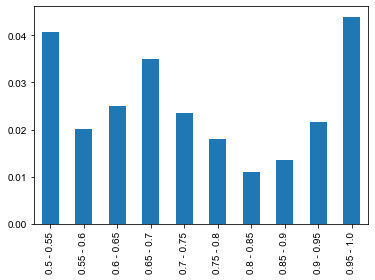

In [190]:
concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
print(concat_count)
concat_count['Ratio'].plot.bar()
    

In [199]:
concat_count

,level_0,index,Total,TS,Ratio
0,0,0.5 - 0.55,559696,22741,0.040631
1,1,0.55 - 0.6,771460,15537,0.020140
2,2,0.6 - 0.65,379805,9474,0.024944
3,3,0.65 - 0.7,212329,7411,0.034903
4,4,0.7 - 0.75,146442,3441,0.023497
5,5,0.75 - 0.8,51445,921,0.017903
6,6,0.8 - 0.85,68368,754,0.011029
7,7,0.85 - 0.9,48192,650,0.013488
8,8,0.9 - 0.95,16789,361,0.021502
9,9,0.95 - 1.0,15295,673,0.044001


In [202]:
# concat_count = concat_count.reset_index()
# concat_count = concat_count.drop('level_0', axis=1)
concat_count.columns = ['EXOTIC_bins_up', 'Total', 'TS', 'Ratio']
concat_count['EXOTIC_bin_start'] = concat_count['EXOTIC_bins_up'].apply(lambda r: r.split(' - ')[1])
concat_count.to_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-up_Rdata.xlsx')
concat_count

,EXOTIC_bins_up,Total,TS,Ratio,EXOTIC_bin_start
0,0.5 - 0.55,559696,22741,0.040631,0.55
1,0.55 - 0.6,771460,15537,0.020140,0.6
2,0.6 - 0.65,379805,9474,0.024944,0.65
3,0.65 - 0.7,212329,7411,0.034903,0.7
4,0.7 - 0.75,146442,3441,0.023497,0.75
5,0.75 - 0.8,51445,921,0.017903,0.8
6,0.8 - 0.85,68368,754,0.011029,0.85
7,0.85 - 0.9,48192,650,0.013488,0.9
8,0.9 - 0.95,16789,361,0.021502,0.95
9,0.95 - 1.0,15295,673,0.044001,1.0


             Total     TS     Ratio
0.5 - 0.55  410247  19417  0.047330
0.55 - 0.6  568888  11267  0.019805
0.6 - 0.65  288339   6332  0.021960
0.65 - 0.7  162262   6514  0.040145
0.7 - 0.75   92626   2082  0.022477
0.75 - 0.8   36385    767  0.021080
0.8 - 0.85   35574    464  0.013043
0.85 - 0.9   33762    650  0.019252
0.9 - 0.95   12476    166  0.013306
0.95 - 1.0   15295    673  0.044001


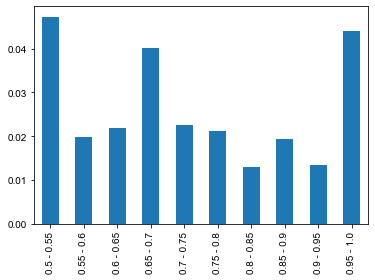

In [170]:
concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
print(concat_count)
concat_count['Ratio'].plot.bar()
    

           Total    TS     Ratio
0.5 - 0.6  28445  6514  0.229003
0.6 - 0.7  15682  2534  0.161587
0.7 - 0.8   5898  1925  0.326382
0.8 - 0.9   3768   866  0.229830
0.9 - 1.0   1266   363  0.286730
1.0 - 1.1      0     0       NaN


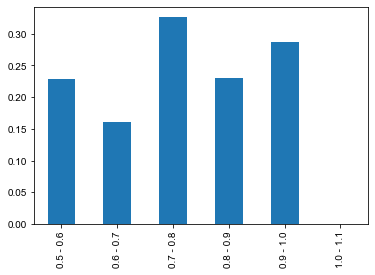

In [117]:
concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)][['snpId', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
print(concat_count)
concat_count['Ratio'].plot.bar()
    

In [145]:
merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_bins_up'] == '0.7 - 0.75'].MAP.value_counts()

P4HA2_131543401-131543577    770
TBCK_107229925-107230117     341
TBCK_107216251-107216323     341
TTC3_38523120-38523184       307
TTC3_38510934-38511014       307
                            ... 
ACE_61560390-61560534          1
ACE_61554456-61554704          1
ACE_61561691-61561902          1
GNL3_52720109-52720121         1
EPB41L1_34783251-34783286      1
Name: MAP, Length: 143, dtype: int64

             Total     TS     Ratio
0.5 - 0.55  145829  13291  0.091141
0.55 - 0.6  155035  20582  0.132757
0.6 - 0.65   88241   9474  0.107365
0.65 - 0.7   50802   7411  0.145880
0.7 - 0.75   35722   9814  0.274733
0.75 - 0.8   12173   1397  0.114762
0.8 - 0.85   14563   1431  0.098263
0.85 - 0.9   19504    650  0.033326
0.9 - 0.95    6188    361  0.058339
0.95 - 1.0    3378    673  0.199230


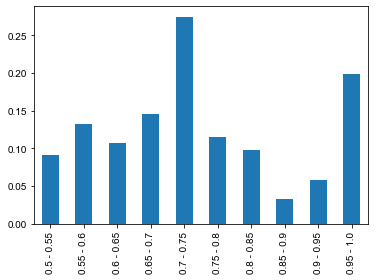

In [142]:
concat_count = pd.concat([
    merge_exotic_sqtl[['snpId', 'MAP', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max[['snpId', 'MAP',  'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
print(concat_count)
concat_count['Ratio'].plot.bar()
    

In [46]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'Tissue']].drop_duplicates()['Tissue'].value_counts()

Muscle - Skeletal                            545
Cells - Cultured fibroblasts                 495
Testis                                       225
Whole Blood                                  110
Artery - Tibial                               95
Heart - Left Ventricle                        85
Liver                                         53
Adrenal Gland                                 50
Brain - Cerebellar Hemisphere                 45
Esophagus - Mucosa                            43
Adipose - Subcutaneous                        43
Skin - Sun Exposed (Lower leg)                41
Cells - EBV-transformed lymphocytes           41
Colon - Sigmoid                               38
Brain - Putamen (basal ganglia)               38
Brain - Frontal Cortex (BA9)                  35
Adipose - Visceral (Omentum)                  34
Artery - Aorta                                33
Skin - Not Sun Exposed (Suprapubic)           33
Heart - Atrial Appendage                      32
Pancreas            

In [45]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId', 'Tissue']].drop_duplicates()['Tissue'].value_counts()

Muscle - Skeletal                            18376
Cells - Cultured fibroblasts                 12584
Adrenal Gland                                 6214
Testis                                        5708
Heart - Left Ventricle                        3204
Whole Blood                                   2569
Artery - Tibial                               2073
Heart - Atrial Appendage                      1647
Esophagus - Mucosa                            1454
Brain - Amygdala                              1310
Skin - Sun Exposed (Lower leg)                1230
Brain - Cerebellar Hemisphere                 1154
Skin - Not Sun Exposed (Suprapubic)           1041
Colon - Sigmoid                                930
Liver                                          858
Artery - Aorta                                 834
Adipose - Subcutaneous                         812
Esophagus - Muscularis                         757
Pancreas                                       668
Artery - Coronary              

In [50]:
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_up']>0.7, 'snpId'].nunique())
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_up']>0.7, 'MAP'].nunique())
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_up']>0.7, 'symbol'].nunique())

4483
278
111


In [344]:
merge_exotic_sqtl_on_tissues_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_tissues_sQTL_EXOTIC_{}.parquet'.format("min"))  

In [51]:
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_down']>0.7, 'snpId'].nunique())
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_down']>0.7, 'MAP'].nunique())
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_down']>0.7, 'symbol'].nunique())

3775
287
130


In [49]:
tqdm.pandas()
concat_df_sqtlseeker_dir['snpId'] = concat_df_sqtlseeker_dir['snpId'].str.replace('_b38', '')
concat_df_sqtlseeker_dir[['CHROM_GRCh38', 'POS_GRCh38', 'REF', 'ALT']] = concat_df_sqtlseeker_dir['snpId'].str.split('_', expand=True)
concat_df_sqtlseeker_dir['-logpv'] = concat_df_sqtlseeker_dir['pv'].apply(lambda r: -np.log10(r))
# concat_df_sqtlseeker_dir['POS_GRCh37'] = concat_df_sqtlseeker_dir[['CHROM_GRCh38', 'POS_GRCh38']].progress_apply(lambda r: apply_liftover(r, 'POS_GRCh38'), axis=1)
concat_df_sqtlseeker_dir

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,MAP,Ratio_num,mRNA_nb,symbol,Adipose - Subcutaneous_exotic,Adipose - Visceral (Omentum)_exotic,Adrenal Gland_exotic,Artery - Aorta_exotic,Artery - Coronary_exotic,Artery - Tibial_exotic,...,fdr.svQTL,Tissue,gene_id,nb.perms,pv.emp,CHROM_GRCh38,POS_GRCh38,REF,ALT,-logpv
4022,C1orf112_169770047-169770112,0.166667,1,C1orf112,0.618567,0.444660,0.728686,0.346471,0.517964,0.561366,...,0.449160,Testis,ENSG00000000460,NaN,NaN,1,169833737,C,T,6.215298
4023,C1orf112_169770047-169770112,0.166667,1,C1orf112,0.618567,0.444660,0.728686,0.346471,0.517964,0.561366,...,0.479461,Testis,ENSG00000000460,NaN,NaN,1,169798892,T,C,5.576174
4024,C1orf112_169770047-169770112,0.166667,1,C1orf112,0.618567,0.444660,0.728686,0.346471,0.517964,0.561366,...,0.479461,Testis,ENSG00000000460,NaN,NaN,1,169798939,C,A,5.576174
4025,C1orf112_169770047-169770112,0.166667,1,C1orf112,0.618567,0.444660,0.728686,0.346471,0.517964,0.561366,...,0.479461,Testis,ENSG00000000460,NaN,NaN,1,169816204,CT,C,5.576174
4026,C1orf112_169770047-169770112,0.166667,1,C1orf112,0.618567,0.444660,0.728686,0.346471,0.517964,0.561366,...,0.479461,Testis,ENSG00000000460,NaN,NaN,1,169818306,A,G,5.576174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,MATR3_138650364-138650425,0.750000,3,MATR3,0.521603,0.517838,0.646324,0.480611,0.496649,0.660195,...,0.527550,Muscle - Skeletal,ENSG00000280987,NaN,NaN,5,139283108,T,G,8.097135
13996,MATR3_138650364-138650425,0.750000,3,MATR3,0.521603,0.517838,0.646324,0.480611,0.496649,0.660195,...,0.527550,Muscle - Skeletal,ENSG00000280987,NaN,NaN,5,139291660,T,C,8.097135
13997,MATR3_138650364-138650425,0.750000,3,MATR3,0.521603,0.517838,0.646324,0.480611,0.496649,0.660195,...,0.978214,Muscle - Skeletal,ENSG00000280987,NaN,NaN,5,139332815,T,C,7.891946
13998,MATR3_138650364-138650425,0.750000,3,MATR3,0.521603,0.517838,0.646324,0.480611,0.496649,0.660195,...,0.573598,Muscle - Skeletal,ENSG00000280987,NaN,NaN,5,139330067,G,A,7.882367


In [41]:
merge_exotic_sqtl_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('max'))    


In [79]:
merge_exotic_sqtl_max.columns

Index(['symbol', 'ensg', 'MAP', 'Exon', 'mean_proportion', 'EXOTIC_max',
       'EXOTIC_tissues_corrected_max', 'Gene', 'Gene_type', 'Gene stable ID',
       'Gene name', 'Gene end (bp)', 'Gene start (bp)', 'Gene type', 'geneId',
       'variants.cis', 'LD', 'best.snp', 'best.nominal.pv', 'shape1', 'shape2',
       'nb.perms', 'pv.emp', 'pv.emp.beta', 'runtime', 'fdr', 'p_tn', 'snpId',
       'F', 'nb.groups', 'md', 'tr.first', 'tr.second', 'info', 'pv',
       'F.svQTL', 'nb.perms.svQTL', 'pv.svQTL', 'fdr.svQTL', 'Tissue',
       'gene_id', 'nb.perm', 'pv.emp.perm', 'EXOTIC_bins_max'],
      dtype='object')

In [61]:
merge_exotic_sqtl_max[['MAP', 'symbol', 'snpId', 'Tissue', 'EXOTIC_tissues_corrected_max', 'EXOTIC_max']]

,MAP,symbol,snpId,Tissue,EXOTIC_tissues_corrected_max,EXOTIC_max
0,A2ML1_8975248-8975309,A2ML1,12_8848014_A_G_b38,Testis,Adipose - Subcutaneous,0.731334
1,A2ML1_8975248-8975309,A2ML1,12_8850431_T_A_b38,Testis,Adipose - Subcutaneous,0.731334
2,A2ML1_8975248-8975309,A2ML1,12_8845245_G_T_b38,Testis,Adipose - Subcutaneous,0.731334
3,A2ML1_8975248-8975309,A2ML1,12_8862121_T_C_b38,Testis,Adipose - Subcutaneous,0.731334
4,A2ML1_8975248-8975309,A2ML1,12_8849393_C_G_b38,Testis,Adipose - Subcutaneous,0.731334
...,...,...,...,...,...,...
9099557,ZXDC_126180378-126181063,ZXDC,3_126457269_G_A_b38,Adrenal Gland,Artery - Tibial,0.910061
9099558,ZXDC_126180378-126181063,ZXDC,3_126441686_A_G_b38,Adrenal Gland,Artery - Tibial,0.910061
9099559,ZXDC_126180378-126181063,ZXDC,3_126461278_C_T_b38,Adrenal Gland,Artery - Tibial,0.910061
9099560,ZXDC_126180378-126181063,ZXDC,3_126464077_C_T_b38,Adrenal Gland,Artery - Tibial,0.910061


In [ ]:
print(merge_exotic_sqtl.shape)
print(merge_exotic_sqtl.symbol.nunique())
print(merge_exotic_sqtl.MAP.nunique())
print(merge_exotic_sqtl.snpId.nunique())


## Data Fig X - Compute sQTL ratio TS/Total

In [37]:
merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore.parquet').reset_index(drop=True)
merge_exotic_sqtl


,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perm,pv.emp.perm
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,1000.0,0.000999
1,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.710608,10100,0.486486,0.837153,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
2,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,2.392523,10100,0.096129,0.525904,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
3,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.279041,10100,0.742105,0.928770,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
4,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,1.698239,10100,0.185922,0.644152,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048975,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048976,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048977,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048978,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.029523,10100,0.355311,0.760261,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999


In [5]:
merge_exotic_sqtl.columns

Index(['symbol', 'ensg', 'HGNC', 'Exon', 'Ratio_num', 'mRNA_nb',
       'mRNA_nb_total', 'MAP', 'mean_proportion', 'Adipose - Subcutaneous',
       'Adipose - Visceral (Omentum)', 'Adrenal Gland', 'Artery - Aorta',
       'Artery - Coronary', 'Artery - Tibial', 'Bladder', 'Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra', 'Breast - Mammary Tissue',
       'Cells - Cultured fibroblasts', 'Cells - EBV-transformed lymphocytes',
       'Cervix - Ectocervix', 'Cervix - Endocervix', 'Colon - Sigmoid',
       'Colon - Transverse', 'Esophagus - Gastroesophageal Junction',
       'Esophagus - Mucosa', 'Esop

In [21]:
tmp_global = merge_exotic_sqtl[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()
tmp_global.name = 'Global'
tmp_tissue = merge_exotic_sqtl_on_tissues_max[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()
tmp_tissue.name = 'Tissue'
concat_tmp = pd.concat([tmp_global, tmp_tissue], axis=1).reset_index()
concat_tmp.columns = ['EXOTIC_bins', 'Global', 'TS']

concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bins'].apply(lambda r: r.split(' - ')[0])
concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bin_start'].astype(float)
concat_tmp



,EXOTIC_bins,Global,TS,EXOTIC_bin_start
0,0.5 - 0.55,290048,17114,0.50
1,0.55 - 0.6,312591,7580,0.55
2,0.6 - 0.65,198580,4673,0.60
3,0.65 - 0.7,117126,2554,0.65
4,0.7 - 0.75,66364,2277,0.70
5,0.75 - 0.8,39648,1095,0.75
6,0.8 - 0.85,32386,1365,0.80
7,0.85 - 0.9,14423,342,0.85
8,0.9 - 0.95,9601,343,0.90
9,0.95 - 1.0,5997,138,0.95


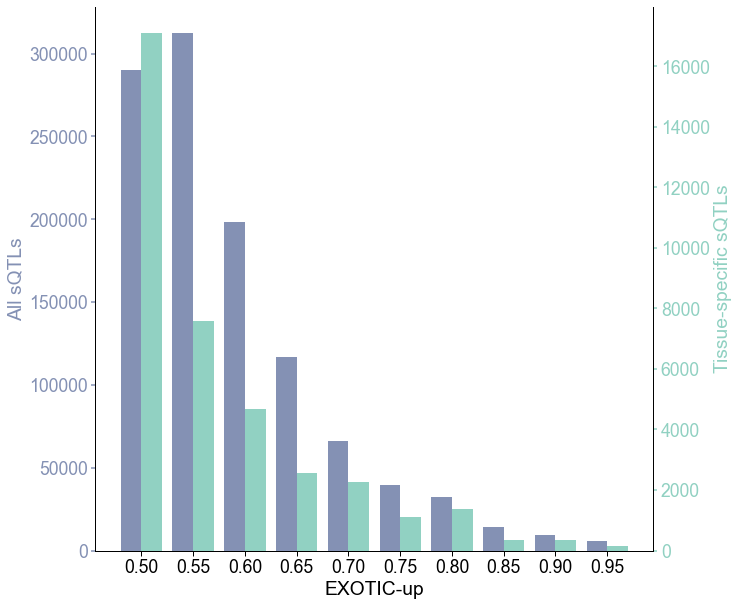

In [23]:
tmp_global = merge_exotic_sqtl[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()
tmp_global.name = 'Global'
tmp_tissue = merge_exotic_sqtl_on_tissues_max[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()
tmp_tissue.name = 'Tissue'
concat_tmp = pd.concat([tmp_global, tmp_tissue], axis=1).reset_index()
concat_tmp.columns = ['EXOTIC_bins', 'Global', 'TS']

concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bins'].apply(lambda r: r.split(' - ')[0])
concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bin_start'].astype(float)
concat_tmp



sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(figsize=(10,10))
data = concat_tmp.reset_index()
ax1_ = ax.bar(data.EXOTIC_bin_start.values, data.Global.values,
#        yerr=error,
       align='edge',
       
       color='#8491B4FF',
       width=-0.020
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(data.EXOTIC_bin_start.values, data.TS.values, color='#91D1C2FF', align='edge', width=0.02)
ax.yaxis.label.set_color('#8491B4FF')
ax2.yaxis.label.set_color('#91D1C2FF')

ax.set_xticks(np.arange(min(data.EXOTIC_bin_start), max(data.EXOTIC_bin_start)+0.05, 0.05))


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#8491B4FF', **tkw)
ax2.tick_params(axis='y', colors='#91D1C2FF', **tkw)
ax.set_ylabel('All sQTLs')
ax.set_xlabel('EXOTIC-up')
ax2.set_ylabel('Tissue-specific sQTLs')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)

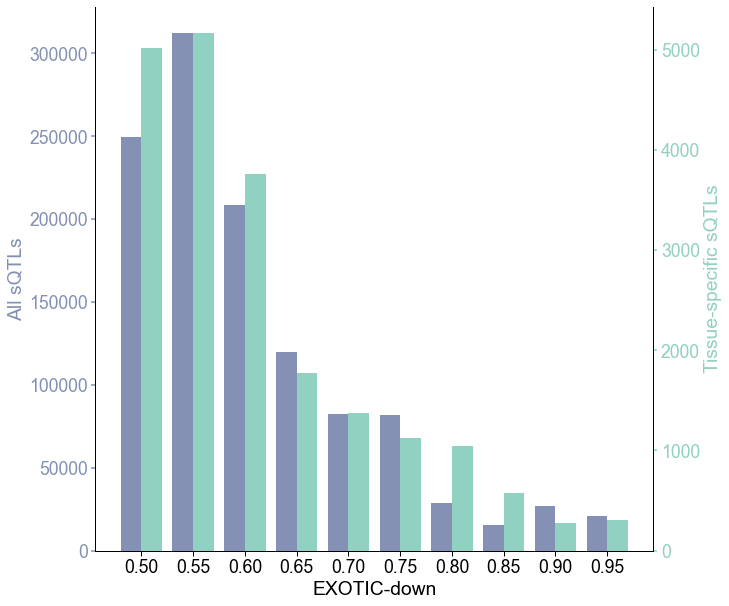

In [25]:
tmp_global = merge_exotic_sqtl[['EXOTIC_bins_down', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_down'].value_counts().sort_index()
tmp_global.name = 'Global'
tmp_tissue = merge_exotic_sqtl_on_tissues_min[['EXOTIC_bins_down', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_down'].value_counts().sort_index()
tmp_tissue.name = 'Tissue'
concat_tmp = pd.concat([tmp_global, tmp_tissue], axis=1).reset_index()
concat_tmp.columns = ['EXOTIC_bins', 'Global', 'TS']

concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bins'].apply(lambda r: r.split(' - ')[0])
concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bin_start'].astype(float)
concat_tmp



sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(figsize=(10,10))
data = concat_tmp.reset_index()
ax1_ = ax.bar(data.EXOTIC_bin_start.values, data.Global.values,
#        yerr=error,
       align='edge',
       
       color='#8491B4FF',
       width=-0.020
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(data.EXOTIC_bin_start.values, data.TS.values, color='#91D1C2FF', align='edge', width=0.02)
ax.yaxis.label.set_color('#8491B4FF')
ax2.yaxis.label.set_color('#91D1C2FF')

ax.set_xticks(np.arange(min(data.EXOTIC_bin_start), max(data.EXOTIC_bin_start)+0.05, 0.05))


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#8491B4FF', **tkw)
ax2.tick_params(axis='y', colors='#91D1C2FF', **tkw)
ax.set_ylabel('All sQTLs')
ax.set_xlabel('EXOTIC-down')
ax2.set_ylabel('Tissue-specific sQTLs')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)

In [10]:
merge_exotic_sqtl_on_tissues_max[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()

0.5 - 0.55    17114
0.55 - 0.6     7580
0.6 - 0.65     4673
0.65 - 0.7     2554
0.7 - 0.75     2277
0.75 - 0.8     1095
0.8 - 0.85     1365
0.85 - 0.9      342
0.9 - 0.95      343
0.95 - 1.0      138
Name: EXOTIC_bins_up, dtype: int64

In [43]:
merge_exotic_sqtl.loc[merge_exotic_sqtl['EXOTIC_up'].isna() == True]

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perm,pv.emp.perm


In [126]:
pprint(list(merge_exotic_sqtl.columns))

['symbol',
 'ensg',
 'HGNC',
 'Exon',
 'Ratio_num',
 'mRNA_nb',
 'mRNA_nb_total',
 'MAP',
 'mean_proportion',
 'Adipose - Subcutaneous',
 'Adipose - Visceral (Omentum)',
 'Adrenal Gland',
 'Artery - Aorta',
 'Artery - Coronary',
 'Artery - Tibial',
 'Bladder',
 'Brain - Amygdala',
 'Brain - Anterior cingulate cortex (BA24)',
 'Brain - Caudate (basal ganglia)',
 'Brain - Cerebellar Hemisphere',
 'Brain - Cerebellum',
 'Brain - Cortex',
 'Brain - Frontal Cortex (BA9)',
 'Brain - Hippocampus',
 'Brain - Hypothalamus',
 'Brain - Nucleus accumbens (basal ganglia)',
 'Brain - Putamen (basal ganglia)',
 'Brain - Spinal cord (cervical c-1)',
 'Brain - Substantia nigra',
 'Breast - Mammary Tissue',
 'Cells - Cultured fibroblasts',
 'Cells - EBV-transformed lymphocytes',
 'Cervix - Ectocervix',
 'Cervix - Endocervix',
 'Colon - Sigmoid',
 'Colon - Transverse',
 'Esophagus - Gastroesophageal Junction',
 'Esophagus - Mucosa',
 'Esophagus - Muscularis',
 'Fallopian Tube',
 'Heart - Atrial Appendage

In [5]:
# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'up'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_up', 'EXOTIC_up', 'LD', 'md']].explode('EXOTIC_tissues_up')
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_up'], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_up'], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

,Tissue,EXOTIC_tissues_up,EXOTIC_up,LD,md,EXOTIC_bins_up,Match_tissues,md_bins
0,Testis,Adipose - Subcutaneous,0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
0,Testis,Adipose - Visceral (Omentum),0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
0,Testis,Adrenal Gland,0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
0,Testis,Artery - Aorta,0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
0,Testis,Artery - Coronary,0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
...,...,...,...,...,...,...,...,...
5048975,Skin - Sun Exposed (Lower leg),Muscle - Skeletal,0.574443,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048976,Skin - Sun Exposed (Lower leg),Muscle - Skeletal,0.574443,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048977,Skin - Sun Exposed (Lower leg),Muscle - Skeletal,0.574443,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048978,Skin - Sun Exposed (Lower leg),Muscle - Skeletal,0.574443,0.027780,0.057091,0.5 - 0.8,False,0.05 - 0.1


In [204]:
test.loc[test['EXOTIC_bins_up'].isna() == True]


,Tissue,EXOTIC_tissues_up,EXOTIC_up,LD,md,EXOTIC_bins_up,Match_tissues,md_bins
17237,Vagina,NaN,NaN,0.033275,0.178609,NaN,False,0.1 - 0.2
17238,Vagina,NaN,NaN,0.033275,0.167094,NaN,False,0.1 - 0.2
17239,Vagina,NaN,NaN,0.033275,0.172856,NaN,False,0.1 - 0.2
32212,Adipose - Visceral (Omentum),NaN,NaN,0.033248,0.054285,NaN,False,0.05 - 0.1
32213,Adipose - Visceral (Omentum),NaN,NaN,0.033248,0.055775,NaN,False,0.05 - 0.1
...,...,...,...,...,...,...,...,...
4954520,Cells - EBV-transformed lymphocytes,NaN,NaN,0.491725,0.211496,NaN,False,0.2 - 1
5002773,Testis,NaN,NaN,0.002716,0.255139,NaN,False,0.2 - 1
5002774,Testis,NaN,NaN,0.002716,0.255139,NaN,False,0.2 - 1
5026047,Nerve - Tibial,NaN,NaN,0.016264,0.106115,NaN,False,0.1 - 0.2


In [201]:
# COMPUTE BINS
r = np.arange(0.5,1.1,0.1)
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
print(bins)
print(test.EXOTIC_bins_up.unique())
test.loc[test['EXOTIC_bins_up'].isna() == True]
# test

[0.5 0.6 0.7 0.8 0.9 1.  1.1]
['0.5 - 0.6', '0.8 - 0.9', '0.6 - 0.7', '0.7 - 0.8', NaN, '0.9 - 1.0']
Categories (5, object): ['0.5 - 0.6' < '0.6 - 0.7' < '0.7 - 0.8' < '0.8 - 0.9' < '0.9 - 1.0']


,Tissue,EXOTIC_tissues_up,EXOTIC_up,LD,md,EXOTIC_bins_up,Match_tissues,md_bins
17237,Vagina,NaN,NaN,0.033275,0.178609,NaN,False,0.1 - 0.2
17238,Vagina,NaN,NaN,0.033275,0.167094,NaN,False,0.1 - 0.2
17239,Vagina,NaN,NaN,0.033275,0.172856,NaN,False,0.1 - 0.2
32212,Adipose - Visceral (Omentum),NaN,NaN,0.033248,0.054285,NaN,False,0.05 - 0.1
32213,Adipose - Visceral (Omentum),NaN,NaN,0.033248,0.055775,NaN,False,0.05 - 0.1
...,...,...,...,...,...,...,...,...
4954520,Cells - EBV-transformed lymphocytes,NaN,NaN,0.491725,0.211496,NaN,False,0.2 - 1
5002773,Testis,NaN,NaN,0.002716,0.255139,NaN,False,0.2 - 1
5002774,Testis,NaN,NaN,0.002716,0.255139,NaN,False,0.2 - 1
5026047,Nerve - Tibial,NaN,NaN,0.016264,0.106115,NaN,False,0.1 - 0.2


In [158]:
# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)


In [218]:
test_ratio = test.loc[(test['Match_tissues'] == True) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
# test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
# test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0).reset_index()
# test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
print(test_ratio.loc[1][0] / (test_ratio[0].sum()))
test_ratio


0.24423420935732895


,md_bins,Match_tissues,0
0,0.05 - 0.1,True,62950
1,0.2 - 1,True,20343


In [219]:
test_ratio = test.loc[(test['Match_tissues'] == False) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
# test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
# test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0).reset_index()
# test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
print(test_ratio.loc[1][0] / (test_ratio[0].sum()))

test_ratio


0.2098726760553466


,md_bins,Match_tissues,0
0,0.05 - 0.1,False,3591952
1,0.2 - 1,False,954090


In [ ]:
test.loc[(test['Match_tissues'] == False) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'MAP', 'Match_tissues']]

In [8]:
test_ratio = test.loc[(test['Match_tissues'] == False) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
# test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0)
test_ratio.columns = test_ratio.columns.astype(str)
test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
# test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
test_ratio


md_bins,0.05 - 0.1,0.2 - 1,Ratio
EXOTIC_bins_up,,,
0.5 - 0.8,3435029,927809,0.212662
0.8 - 1,155306,25928,0.143064


In [7]:
test_ratio = test.loc[(test['Match_tissues'] == True) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
# test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0)
test_ratio.columns = test_ratio.columns.astype(str)
test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
# test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
test_ratio


md_bins,0.05 - 0.1,0.2 - 1,Ratio
EXOTIC_bins_up,,,
0.5 - 0.8,60386,19449,0.243615
0.8 - 1,2564,894,0.258531


In [ ]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'up'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

l = list()
for match in [True, False]:
    test_ratio = test.loc[(test['Match_tissues'] == match) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
    # test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
    test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0)
    test_ratio.columns = test_ratio.columns.astype(str)
    test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
    test_ratio.columns = [c + '_match_{}'.format(str(match)) for c in test_ratio.columns]
    # test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
    l.append(test_ratio)
concat_df = pd.concat(l, axis=1)
concat_df['Enrichment'] = concat_df['Ratio_match_True'] / concat_df['Ratio_match_False']
concat_df


In [19]:
test.loc[test['Tissue'] == 'Testis']

,Tissue,EXOTIC_tissues_down,EXOTIC_down,LD,md,EXOTIC_bins_down,Match_tissues,md_bins
0,Testis,Brain - Cerebellar Hemisphere,0.713205,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
22,Testis,Brain - Cerebellar Hemisphere,0.713205,0.016791,0.073751,0.5 - 0.8,False,0.05 - 0.1
43,Testis,Brain - Cerebellar Hemisphere,0.811227,0.016791,0.097385,0.8 - 1,False,0.05 - 0.1
44,Testis,Minor Salivary Gland,0.505000,0.016791,0.061683,0.5 - 0.8,False,0.05 - 0.1
45,Testis,Minor Salivary Gland,0.505000,0.016791,0.067968,0.5 - 0.8,False,0.05 - 0.1
...,...,...,...,...,...,...,...,...
5048810,Testis,Heart - Atrial Appendage,0.617748,0.005457,0.057881,0.5 - 0.8,False,0.05 - 0.1
5048811,Testis,Heart - Atrial Appendage,0.612302,0.005457,0.059210,0.5 - 0.8,False,0.05 - 0.1
5048812,Testis,Heart - Atrial Appendage,0.617748,0.005457,0.060495,0.5 - 0.8,False,0.05 - 0.1
5048813,Testis,Heart - Atrial Appendage,0.617748,0.005457,0.057881,0.5 - 0.8,False,0.05 - 0.1


In [27]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'up'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

l = list()
for match in [True, False]:
    test_ratio = test.loc[(test['Match_tissues'] == match) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_{}'.format(min_max), 'md_bins', 'Match_tissues', 'Tissue']].value_counts().sort_index().reset_index()
    # test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
    test_ratio = test_ratio.pivot(index=['EXOTIC_bins_{}'.format(min_max), 'Tissue'], columns='md_bins', values=0)
    test_ratio.columns = test_ratio.columns.astype(str)
    test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
    test_ratio.columns = [c + '_match_{}'.format(str(match)) for c in test_ratio.columns]
    # test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
    l.append(test_ratio)
concat_df = pd.concat(l, axis=1)
concat_df['Enrichment'] = concat_df['Ratio_match_True'] / concat_df['Ratio_match_False']
concat_df


0.05 - 0.1_match_True  \
EXOTIC_bins_up Tissue                                                             
0.5 - 0.8      Adipose - Subcutaneous                                     846.0   
               Adipose - Visceral (Omentum)                               218.0   
               Adrenal Gland                                             1145.0   
               Artery - Aorta                                             890.0   
               Artery - Coronary                                           69.0   
               Artery - Tibial                                           2182.0   
               Brain - Amygdala                                           199.0   
               Brain - Anterior cingulate cortex (BA24)                   123.0   
               Brain - Caudate (basal ganglia)                            275.0   
               Brain - Cerebellar Hemisphere                              411.0   
               Brain - Cerebellum                                         201.0   
               Brain - Cortex                                              45.0   
               Brain - Frontal Cortex (BA9)                               102.0   
               Brain - Hippocampus                                         18.0   
               Brain - Hypothalamus                                        65.0   
               Brain - Nucleus accumbens (basal ganglia)                  156.0   
               Brain - Putamen (basal ganglia)                            342.0   
               Brain - Spinal cord (cervical c-1)                           NaN   
               Brain - Substantia nigra                                    67.0   
               Breast - Mammary Tissue                                    340.0   
               Cells - Cultured fibroblasts                             17427.0   
               Cells - EBV-transformed lymphocytes                        167.0   
               Colon - Sigmoid                                            499.0   
               Colon - Transverse                                         590.0   
               Esophagus - Gastroesophageal Junction                      163.0   
               Esophagus - Mucosa                                         381.0   
               Esophagus - Muscularis                                     617.0   
               Heart - Atrial Appendage                                   718.0   
               Heart - Left Ventricle                                    2270.0   
               Kidney - Cortex                                              2.0   
               Liver                                                      275.0   
               Lung                                                       152.0   
               Minor Salivary Gland                                        22.0   
               Muscle - Skeletal                                        14780.0   
               Nerve - Tibial                                             228.0   
               Ovary                                                        NaN   
               Pancreas                                                   323.0   
               Pituitary                                                  205.0   
               Prostate                                                   127.0   
               Skin - Not Sun Exposed (Suprapubic)                        483.0   
               Skin - Sun Exposed (Lower leg)                            1031.0   
               Small Intestine - Terminal Ileum                            41.0   
               Spleen                                                      35.0   
               Stomach                                                     83.0   
               Testis                                                    9773.0   
               Thyroid                                                    449.0   
               Uterus                                                     

In [25]:

# # COMPUTE BINS
# # r = np.arange(0.5,1.05,0.05)
# r = [0.5,0.8,1]
# bins = r
# labels = bins.copy()
# labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

# min_max = 'down'

# # COMPUTE BINS COLUMNS

# test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
# test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

# test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
# test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# # COMPUTE BINS
# bins = [0,0.05,0.1,0.2,1]
# labels = bins.copy()
# labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
# test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

l = list()
for match in [True, False]:
    test_ratio = test.loc[(test['Match_tissues'] == match) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_{}'.format(min_max), 'md_bins', 'Match_tissues', 'Tissue']].value_counts().sort_index().reset_index()
    # test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
    test_ratio = test_ratio.pivot(index=['EXOTIC_bins_{}'.format(min_max), 'Tissue'], columns='md_bins', values=0)
    test_ratio.columns = test_ratio.columns.astype(str)
    test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
    test_ratio.columns = [c + '_match_{}'.format(str(match)) for c in test_ratio.columns]
    # test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
    l.append(test_ratio)
concat_df = pd.concat(l, axis=1)
concat_df['Enrichment'] = concat_df['Ratio_match_True'] / concat_df['Ratio_match_False']
concat_df


0.05 - 0.1_match_True  \
EXOTIC_bins_down Tissue                                                
0.5 - 0.8        Adipose - Subcutaneous                        757.0   
                 Adipose - Visceral (Omentum)                    NaN   
                 Adrenal Gland                                  25.0   
                 Artery - Aorta                                 88.0   
                 Artery - Coronary                               NaN   
...                                                              ...   
0.8 - 1          Testis                                       3288.0   
                 Thyroid                                         NaN   
                 Uterus                                          NaN   
                 Vagina                                          NaN   
                 Whole Blood                                    19.0   

                                               0.2 - 1_match_True  \
EXOTIC_bins_down Tissue                                             
0.5 - 0.8        Adipose - Subcutaneous                       3.0   
                 Adipose - Visceral (Omentum)                 NaN   
                 Adrenal Gland                                NaN   
                 Artery - Aorta                               NaN   
                 Artery - Coronary                            NaN   
...                                                           ...   
0.8 - 1          Testis                                      36.0   
                 Thyroid                                      NaN   
                 Uterus                                       NaN   
                 Vagina                                       NaN   
                 Whole Blood                                  NaN   

                                               Ratio_match_True  \
EXOTIC_bins_down Tissue                                           
0.5 - 0.8        Adipose - Subcutaneous                0.003947   
                 Adipose - Visceral (Omentum)               NaN   
                 Adrenal Gland                              NaN   
                 Artery - Aorta                             NaN   
                 Artery - Coronary                          NaN   
...                                                         ...   
0.8 - 1          Testis                                0.010830   
                 Thyroid                                    NaN   
                 Uterus                                     NaN   
                 Vagina                                     NaN   
                 Whole Blood                                NaN   

                                               0.05 - 0.1_match_False  \
EXOTIC_bins_down Tissue                                                 
0.5 - 0.8        Adipose - Subcutaneous                        113551   
                 Adipose - Visceral (Omentum)                   80169   
                 Adrenal Gland                                  32981   
                 Artery - Aorta                                 88290   
                 Artery - Coronary                              38059   
...                                                               ...   
0.8 - 1          Testis                                          3022   
                 Thyroid                                        11164   
                 Uterus                                           336   
                 Vagina                                           362   
                 Whole Blood                                     1147   

                                               0.2 - 1_match_False  \
EXOTIC_bins_down Tissue                                              
0.5 - 0.8        Adipose - Subcutaneous                      19012   
                 Adipose - Visceral (Omentum)                19900   
                 Adrenal Gland                               22870   
                 Artery - Aorta         

In [26]:
pd.options.display.max_rows = 100
concat_df

0.05 - 0.1_match_True  \
EXOTIC_bins_down Tissue                                                             
0.5 - 0.8        Adipose - Subcutaneous                                     757.0   
                 Adipose - Visceral (Omentum)                                 NaN   
                 Adrenal Gland                                               25.0   
                 Artery - Aorta                                              88.0   
                 Artery - Coronary                                            NaN   
                 Artery - Tibial                                            444.0   
                 Brain - Amygdala                                             6.0   
                 Brain - Anterior cingulate cortex (BA24)                    14.0   
                 Brain - Caudate (basal ganglia)                              NaN   
                 Brain - Cerebellar Hemisphere                              206.0   
                 Brain - Cerebellum                                        2398.0   
                 Brain - Cortex                                              10.0   
                 Brain - Frontal Cortex (BA9)                                 2.0   
                 Brain - Hippocampus                                         24.0   
                 Brain - Hypothalamus                                        70.0   
                 Brain - Nucleus accumbens (basal ganglia)                   19.0   
                 Brain - Putamen (basal ganglia)                              8.0   
                 Brain - Spinal cord (cervical c-1)                           1.0   
                 Brain - Substantia nigra                                     NaN   
                 Breast - Mammary Tissue                                     27.0   
                 Cells - Cultured fibroblasts                              2770.0   
                 Cells - EBV-transformed lymphocytes                        412.0   
                 Colon - Sigmoid                                             17.0   
                 Colon - Transverse                                           2.0   
                 Esophagus - Gastroesophageal Junction                       38.0   
                 Esophagus - Mucosa                                          56.0   
                 Esophagus - Muscularis                                     695.0   
                 Heart - Atrial Appendage                                   208.0   
                 Heart - Left Ventricle                                       5.0   
                 Kidney - Cortex                                              4.0   
                 Liver                                                     1393.0   
                 Lung                                                       631.0   
                 Minor Salivary Gland                                         NaN   
                 Muscle - Skeletal                                         6955.0   
                 Nerve - Tibial                                             836.0   
                 Ovary                                                     1781.0   
                 Pancreas                                                  1109.0   
                 Pituitary                                                 1992.0   
                 Prostate                                                   240.0   
                 Skin - Not Sun Exposed (Suprapubic)                       3114.0   
                 Skin - Sun Exposed (Lower leg)                             790.0   
                 Small Intestine - Terminal Ileum                            99.0   
                 Spleen                                                     727.0   
                 Stomach                                                      1.0   
                 Testis                                                   22906.0   
                 Thyroid                                         

In [23]:

# test_ratio = test.loc[(test['Match_tissues'] == match) & (test['Tissue'] == "Testis") & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_{}'.format(min_max), 'md_bins', 'Match_tissues', 'Tissue']].value_counts().sort_index().reset_index()
test_ratio = test_ratio.pivot(index=['EXOTIC_bins_{}'.format(min_max), 'Tissue'], columns='md_bins', values=0)
test_ratio.columns = test_ratio.columns.astype(str)
test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
test_ratio.columns = [c + '_match_{}'.format(str(match)) for c in test_ratio.columns]
test_ratio


,,0.05 - 0.1_match_False,0.2 - 1_match_False,Ratio_match_False
EXOTIC_bins_down,Tissue,,,
0.5 - 0.8,Testis,115519,16244,0.123282
0.8 - 1,Testis,3022,1152,0.275994


In [ ]:
test_ratio.pivot(id_vars=['EXOTIC_bins_down', 'md_bins'])

In [45]:
test_boxenplot = test.loc[(~test['md_bins'].isin(['0 - 0.05'])),  ['EXOTIC_bins_up', 'md_bins', 'md', 'Match_tissues']]
# test_boxenplot.to_parquet('/gstock/EXOTIC/data/QTL/violinplot_QTL.parquet')
test_boxenplot

,EXOTIC_bins_up,md_bins,md,Match_tissues
0,0.5 - 0.8,0.05 - 0.1,0.097385,False
0,0.5 - 0.8,0.05 - 0.1,0.097385,False
0,0.5 - 0.8,0.05 - 0.1,0.097385,False
0,0.5 - 0.8,0.05 - 0.1,0.097385,False
0,0.5 - 0.8,0.05 - 0.1,0.097385,False
...,...,...,...,...
5048975,0.5 - 0.8,0.05 - 0.1,0.058280,False
5048976,0.5 - 0.8,0.05 - 0.1,0.058280,False
5048977,0.5 - 0.8,0.05 - 0.1,0.058280,False
5048978,0.5 - 0.8,0.05 - 0.1,0.057091,False


In [16]:
test_boxenplot.EXOTIC_bins_up.unique()

['0.5 - 0.8', '0.8 - 1', NaN]
Categories (2, object): ['0.5 - 0.8' < '0.8 - 1']

In [83]:
print(list(merge_exotic_sqtl.columns))

['symbol', 'ensg', 'HGNC', 'Exon', 'Ratio_num', 'mRNA_nb', 'mRNA_nb_total', 'MAP', 'mean_proportion', 'Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)', 'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary', 'Artery - Tibial', 'Bladder', 'Brain - Amygdala', 'Brain - Anterior cingulate cortex (BA24)', 'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere', 'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)', 'Brain - Hippocampus', 'Brain - Hypothalamus', 'Brain - Nucleus accumbens (basal ganglia)', 'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)', 'Brain - Substantia nigra', 'Breast - Mammary Tissue', 'Cells - Cultured fibroblasts', 'Cells - EBV-transformed lymphocytes', 'Cervix - Ectocervix', 'Cervix - Endocervix', 'Colon - Sigmoid', 'Colon - Transverse', 'Esophagus - Gastroesophageal Junction', 'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Fallopian Tube', 'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Kidney - C

In [44]:
merge_exotic_sqtl[['MAP', 'snpId']].head()

,MAP,snpId
0,A2ML1_8975248-8975309,12_8828564_C_G_b38
1,A2ML1_8997768-8997770,12_8858373_A_G_b38
2,A2ML1_8997768-8997770,12_8866835_C_T_b38
3,A2ML1_8997768-8997770,12_8857224_G_A_b38
4,A2ML1_8997768-8997770,12_8862121_T_C_b38


In [40]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'down'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md', 'snpId']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
# bins = [0,0.05,0.1,0.2,1]
# labels = bins.copy()
# labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
# test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

NameError: name 'test' is not defined

In [42]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'down'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test


# test_boxenplot = test.loc[(~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'md', 'Match_tissues']]
f, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size' : 18})
# print(test_boxenplot[['EXOTIC_bins_up', 'md']].pivot(columns='EXOTIC_bins_up', values='md').describe())
# for col in test_boxenplot.EXOTIC_bins_up.unique().tolist():
#     print(col, test_boxenplot[['EXOTIC_bins_up', 'md']].pivot(columns='EXOTIC_bins_up', values='md')[col].quantile(0.95))

print(test.groupby(['EXOTIC_bins', '']))

test = test.rename({'EXOTIC_bins_{}'.format(min_max) : 'EXOTIC-{}'.format(min_max), 'Match_tissues' : 'sQTL tissue matching EXOTIC tissue'}, axis=1)
data = test
data['sQTL tissue matching EXOTIC tissue'] = data['sQTL tissue matching EXOTIC tissue'].astype(str)


b = sns.violinplot(data=data, x='EXOTIC-{}'.format(min_max), y='md', hue='sQTL tissue matching EXOTIC tissue', showfliers=False, linewidth=0, palette=['#F39B7FFF', '#DC0000FF'])

plt.ylim(0,0.6)

hline = [
    [0.05,0.25],
    [0.25,0.45],
    [0.55,0.75],
    [0.75,0.95]
]

i = 0
for j, bin in enumerate(data['EXOTIC-{}'.format(min_max)].unique()):
    print(bin)
    for match in data['sQTL tissue matching EXOTIC tissue'].unique():
        print(match)

        m = data.loc[(data['EXOTIC-{}'.format(min_max)] == bin)  & (data['sQTL tissue matching EXOTIC tissue'] == match), 'md'].median()
        print(m)
        
        plt.axhline(xmin=hline[i][0], xmax=hline[i][1], y=m, color='black', lw=0.75)
        i+=1

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0)
ax.xaxis.set_ticks_position('none') 



x = 'EXOTIC-{}'.format(min_max)
y = 'md'
hue = 'sQTL tissue matching EXOTIC tissue'
hue_order=['False', 'True']
box_pairs=[
    (("0.5 - 0.8", 'True'), ("0.5 - 0.8", 'False')),
    (("0.8 - 1", "True"), ("0.8 - 1", 'False')),
    (("0.5 - 0.8", 'True'), ("0.8 - 1", 'True')),
    (("0.5 - 0.8", 'False'), ("0.8 - 1", 'False')),
    ]

medians = data[[x, y, hue]].groupby([x, hue])[y].median().sort_index(ascending=True).values.tolist()
vertical_offset = data[y].median() * 0.05 # offset from median for display



ax.set_ylabel('sQTL Effect Size (MD)')

# for j, xtick in enumerate(b.get_xticks()):
#     print(j, xtick)
#     if j <0:
#         color='grey'
#     else:
#         color='w'
#     b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 2), 
#             horizontalalignment='center',size='medium',color='black',weight='semibold')

# add_stat_annotation(b, data=data, x=x, y=y, hue=hue,
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='inside', verbose=2)


,Tissue,EXOTIC_tissues_down,EXOTIC_down,LD,md,EXOTIC_bins_down,Match_tissues,md_bins
0,Testis,Brain - Cerebellar Hemisphere,0.713205,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
1,Esophagus - Mucosa,Minor Salivary Gland,0.505000,0.011752,0.074017,0.5 - 0.8,False,0.05 - 0.1
2,Esophagus - Mucosa,Minor Salivary Gland,0.505000,0.011752,0.055690,0.5 - 0.8,False,0.05 - 0.1
3,Esophagus - Mucosa,Minor Salivary Gland,0.505000,0.011752,0.071775,0.5 - 0.8,False,0.05 - 0.1
4,Esophagus - Mucosa,Minor Salivary Gland,0.505000,0.011752,0.051889,0.5 - 0.8,False,0.05 - 0.1
...,...,...,...,...,...,...,...,...
5048975,Skin - Sun Exposed (Lower leg),Brain - Nucleus accumbens (basal ganglia),0.542398,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048976,Skin - Sun Exposed (Lower leg),Brain - Nucleus accumbens (basal ganglia),0.542398,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048977,Skin - Sun Exposed (Lower leg),Brain - Nucleus accumbens (basal ganglia),0.542398,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048978,Skin - Sun Exposed (Lower leg),Brain - Nucleus accumbens (basal ganglia),0.542398,0.027780,0.057091,0.5 - 0.8,False,0.05 - 0.1


0.5 - 0.8
False
0.105190925109288
True
0.10156121235574199
0.8 - 1
False
0.09193243005272064
True
0.123216993113872


Text(0, 0.5, 'sQTL Effect Size (MD)')

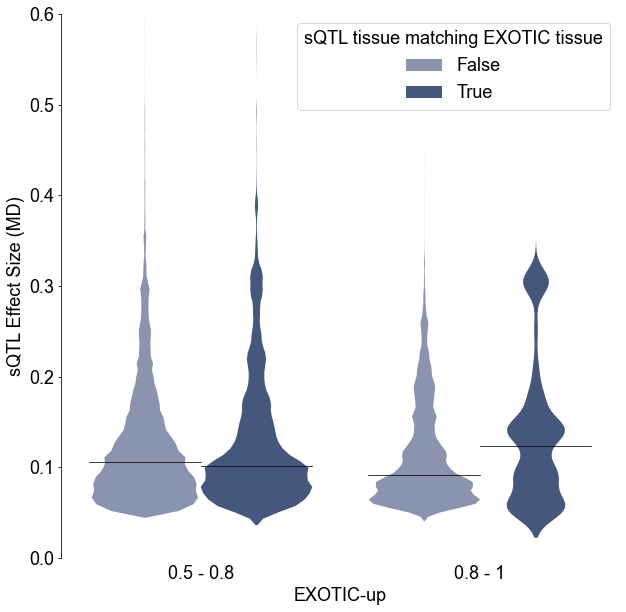

In [87]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'up'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test


# test_boxenplot = test.loc[(~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'md', 'Match_tissues']]
f, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size' : 18})
# print(test_boxenplot[['EXOTIC_bins_up', 'md']].pivot(columns='EXOTIC_bins_up', values='md').describe())
# for col in test_boxenplot.EXOTIC_bins_up.unique().tolist():
#     print(col, test_boxenplot[['EXOTIC_bins_up', 'md']].pivot(columns='EXOTIC_bins_up', values='md')[col].quantile(0.95))
test = test.rename({'EXOTIC_bins_{}'.format(min_max) : 'EXOTIC-{}'.format(min_max), 'Match_tissues' : 'sQTL tissue matching EXOTIC tissue'}, axis=1)
data = test
data['sQTL tissue matching EXOTIC tissue'] = data['sQTL tissue matching EXOTIC tissue'].astype(str)

b = sns.violinplot(data=data, x='EXOTIC-{}'.format(min_max), y='md', hue='sQTL tissue matching EXOTIC tissue', showfliers=False, linewidth=0, palette=['#8491B4FF', '#3C5488FF'])

plt.ylim(0,0.6)

hline = [
    [0.05,0.25],
    [0.25,0.45],
    [0.55,0.75],
    [0.75,0.95]
]

i = 0
for j, bin in enumerate(data['EXOTIC-{}'.format(min_max)].unique()):
    print(bin)
    for match in data['sQTL tissue matching EXOTIC tissue'].unique():
        print(match)

        m = data.loc[(data['EXOTIC-{}'.format(min_max)] == bin)  & (data['sQTL tissue matching EXOTIC tissue'] == match), 'md'].median()
        print(m)
        
        plt.axhline(xmin=hline[i][0], xmax=hline[i][1], y=m, color='black', lw=0.75)
        i+=1

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0)
ax.xaxis.set_ticks_position('none') 



x = 'EXOTIC-{}'.format(min_max)
y = 'md'
hue = 'sQTL tissue matching EXOTIC tissue'
hue_order=['False', 'True']
box_pairs=[
    (("0.5 - 0.8", 'True'), ("0.5 - 0.8", 'False')),
    (("0.8 - 1", "True"), ("0.8 - 1", 'False')),
    (("0.5 - 0.8", 'True'), ("0.8 - 1", 'True')),
    (("0.5 - 0.8", 'False'), ("0.8 - 1", 'False')),
    ]

medians = data[[x, y, hue]].groupby([x, hue])[y].median().sort_index(ascending=True).values.tolist()
vertical_offset = data[y].median() * 0.05 # offset from median for display



ax.set_ylabel('sQTL Effect Size (MD)')

# for j, xtick in enumerate(b.get_xticks()):
#     print(j, xtick)
#     if j <0:
#         color='grey'
#     else:
#         color='w'
#     b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 2), 
#             horizontalalignment='center',size='medium',color='black',weight='semibold')

# add_stat_annotation(b, data=data, x=x, y=y, hue=hue,
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='inside', verbose=2)


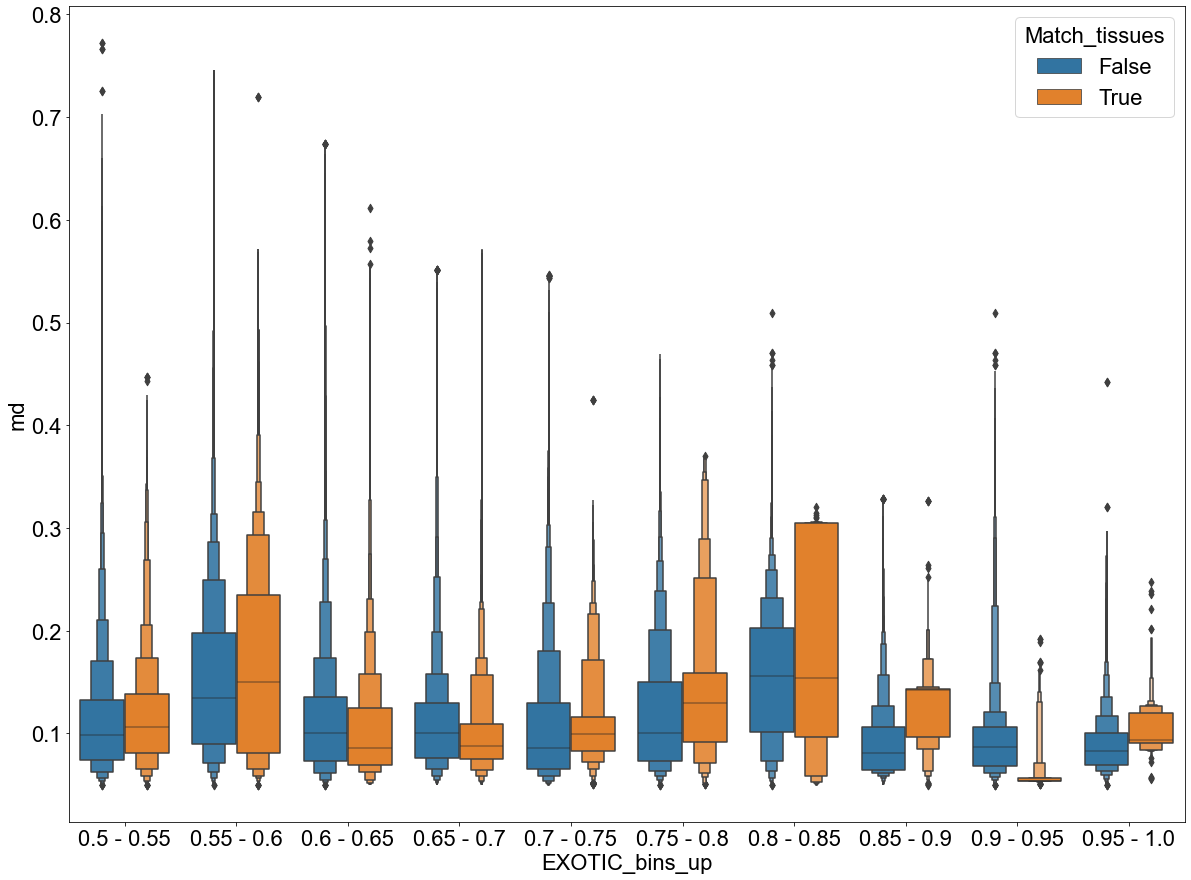

In [106]:
plt.figure(figsize=(20,15))
sns.boxenplot(data=test, x='EXOTIC_bins_up', y='md', hue='Match_tissues')

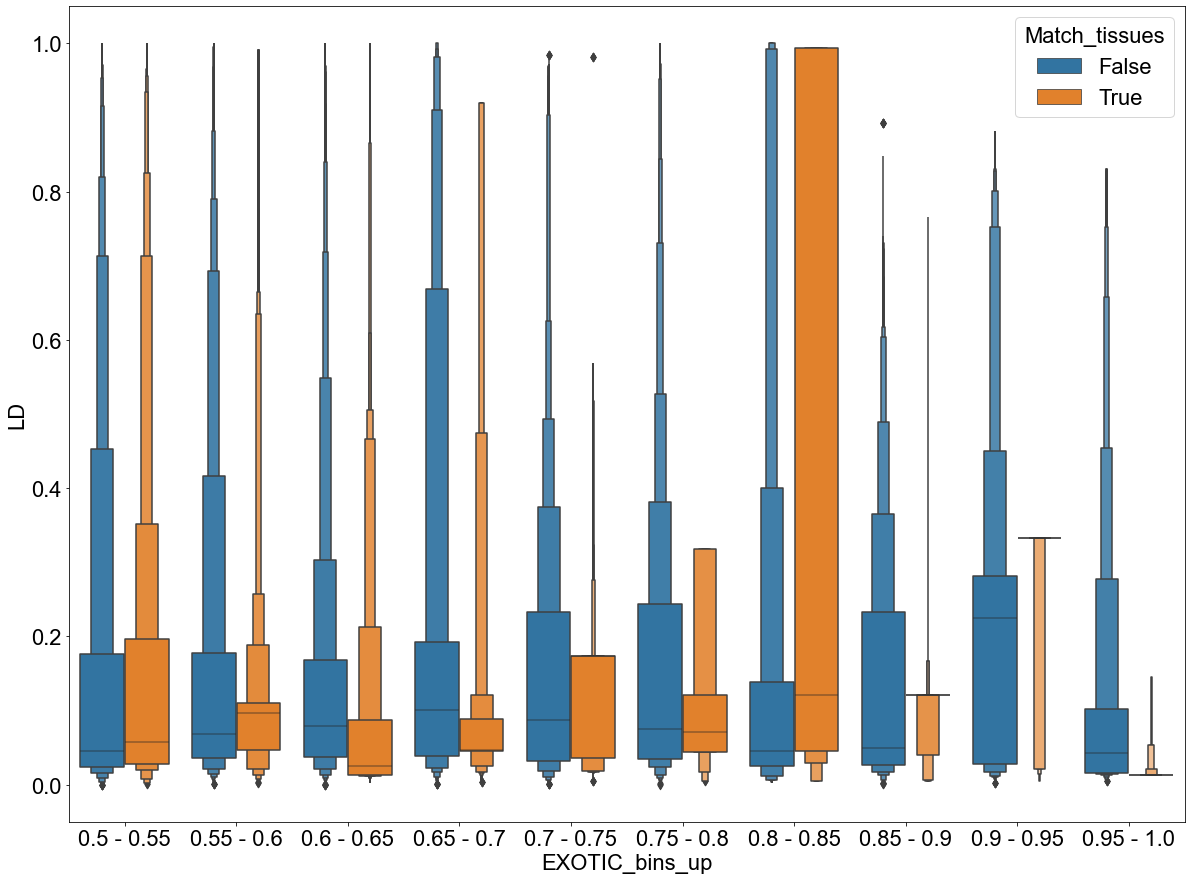

In [107]:
plt.figure(figsize=(20,15))
sns.boxenplot(data=test, x='EXOTIC_bins_up', y='LD', hue='Match_tissues')

In [81]:
pd.options.display.max_rows = 100
merge_exotic_sqtl.loc[0].T

symbol                                                                         AASDH
ensg                                                                 ENSG00000157426
HGNC                                                                           23993
Exon                                                               57211293-57211456
Ratio_num                                                                        0.5
mRNA_nb                                                                            3
mRNA_nb_total                                                                      6
MAP                                                          AASDH_57211293-57211456
mean_proportion                                                              0.76619
Adipose - Subcutaneous                                                       0.50325
Adipose - Visceral (Omentum)                                                     0.5
Adrenal Gland                                                    

In [70]:
# for min_max, r in zip(['min', 'max'], [np.arange(0,0.51,0.01), np.arange(0.5,1.01,0.01)]):
for min_max in ['down', 'up']:

    print(min_max)

    # COMPUTE BINS
    bins = np.arange(0,0.51,0.01)
    labels = bins.copy()
    labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
    
    
    # LOAD FILE
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore.parquet')


    # COMPUTE BINS COLUMNS
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
        
    # COMPUTE NB sQTL & GENES
    exotic_sqtl_all = pd.concat(
        [merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'symbol', ]].drop_duplicates()[['EXOTIC_bins_{}'.format(min_max), 'snpId']].groupby(['EXOTIC_bins_{}'.format(min_max)]).count(),
        merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'symbol' ]].drop_duplicates().groupby(['EXOTIC_bins_{}'.format(min_max)]).count()],
        axis=1
    ).rename({'snpId': 'snpId_total'}, axis=1)
    exotic_sqtl_all['Ratio_sQTL_total'] = exotic_sqtl_all['snpId_total'] / exotic_sqtl_all['symbol']

    
    # LOAD FILE WITH MERGE ON TISSUES
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format(min_max))
    
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

    # COMPUTE NB sQTL & GENES ON TISSUES
    exotic_sqtl_on_tissues = pd.concat(
        [merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'symbol' ]].drop_duplicates()[['EXOTIC_bins_{}'.format(min_max), 'snpId']].groupby(['EXOTIC_bins_{}'.format(min_max)]).count(),
        merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'symbol' ]].drop_duplicates().groupby(['EXOTIC_bins_{}'.format(min_max)]).count()],
        axis=1
    )
    exotic_sqtl_on_tissues['Ratio_sQTL'] = exotic_sqtl_on_tissues['snpId'] / exotic_sqtl_on_tissues['symbol']

#     # CONCAT HORIZONTALLY
    concat_final = pd.concat([exotic_sqtl_on_tissues, exotic_sqtl_all], axis=1).dropna()
    concat_final['Ratio'] = concat_final['snpId'] / concat_final['snpId_total']
    concat_final['Enrichment'] = concat_final['Ratio_sQTL'] / concat_final['Ratio_sQTL_total']
    concat_final = concat_final.reset_index()
    
#     # COMPUTE CUMSUM & BIN START
    if min_max == 'min':
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bins_{}'.format(min_max)].apply(lambda r: r.split(' - ')[0])
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bin_start'].astype(float)
        concat_final = concat_final.sort_values(by='EXOTIC_bin_start', ascending=False)
        concat_final['Cumsum_total'] = (concat_final['snpId_total'].cumsum() / concat_final['snpId_total'].sum()) * 100
        concat_final['Cumsum_tissues'] = (concat_final['snpId'].cumsum() / concat_final['snpId'].sum()) * 100
        concat_final = concat_final.sort_values(by='EXOTIC_bin_start', ascending=True)
    else:
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bins_{}'.format(min_max)].apply(lambda r: r.split(' - ')[1])
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bin_start'].astype(float)
        concat_final['Cumsum_total'] = (concat_final['snpId_total'].cumsum() / concat_final['snpId_total'].sum()) * 100
        concat_final['Cumsum_tissues'] = (concat_final['snpId'].cumsum() / concat_final['snpId'].sum()) * 100
    
    # OUTPUT
    concat_final.to_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC_modified-{}_Rdata.xlsx'.format(min_max), index=False)

    print(concat_final[['EXOTIC_bins_{}'.format(min_max), 'Ratio']])

down
  EXOTIC_bins_down     Ratio
0       0.5 - 0.55  0.047366
1       0.55 - 0.6  0.044294
2       0.6 - 0.65  0.068162
3       0.65 - 0.7  0.045632
4       0.7 - 0.75  0.035241
5       0.75 - 0.8  0.018892
6       0.8 - 0.85  0.043109
7       0.85 - 0.9  0.020759
8       0.9 - 0.95  0.004061
9       0.95 - 1.0  0.000304
up
  EXOTIC_bins_up     Ratio
0     0.5 - 0.55  0.157792
1     0.55 - 0.6  0.141309
2     0.6 - 0.65  0.138858
3     0.65 - 0.7  0.135902
4     0.7 - 0.75  0.191355
5     0.75 - 0.8  0.162559
6     0.8 - 0.85  0.235909
7     0.85 - 0.9  0.077425
8     0.9 - 0.95  0.135346
9     0.95 - 1.0  0.145570


In [359]:
pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-{}_Rdata.xlsx'.format('max'))


,EXOTIC_bins_max,snpId,symbol,Ratio_sQTL,snpId_total,symbol.1,Ratio_sQTL_total,Ratio,Enrichment,EXOTIC_bin_start,Cumsum_total,Cumsum_tissues
0,0.53 - 0.54,273,8,34.125000,487,10,48.700000,0.560575,0.700719,0.54,0.122124,0.377944
1,0.54 - 0.55,269,4,67.250000,295,6,49.166667,0.911864,1.367797,0.55,0.196101,0.750350
2,0.55 - 0.56,209,7,29.857143,255,12,21.250000,0.819608,1.405042,0.56,0.260047,1.039691
3,0.56 - 0.57,202,6,33.666667,317,10,31.700000,0.637224,1.062040,0.57,0.339541,1.319342
4,0.57 - 0.58,107,7,15.285714,317,10,31.700000,0.337539,0.482199,0.58,0.419034,1.467473
5,0.58 - 0.59,180,5,36.000000,326,11,29.636364,0.552147,1.214724,0.59,0.500785,1.716667
6,0.59 - 0.6,77,3,25.666667,786,16,49.125000,0.097964,0.522477,0.60,0.697889,1.823266
7,0.6 - 0.61,58,4,14.500000,724,14,51.714286,0.080110,0.280387,0.61,0.879446,1.903562
8,0.61 - 0.62,258,3,86.000000,411,11,37.363636,0.627737,2.301703,0.62,0.982511,2.260740
9,0.62 - 0.63,153,5,30.600000,462,17,27.176471,0.331169,1.125974,0.63,1.098366,2.472554


## Data Fig X - Compute sQTL ratio TS/Total for each tissue


In [360]:
for min_max, r in zip(['min', 'max'], [np.arange(0,0.51,0.01), np.arange(0.5,1.01,0.01)]):
    print(min_max)

    # COMPUTE BINS
    bins = r
    labels = bins.copy()
    labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
    
    
    # LOAD FILE
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format(min_max))
    
    merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

    
    # COMPUTE NB sQTL & GENES
    exotic_sqtl_all = pd.concat(
        [merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'Tissue']].drop_duplicates()[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'Tissue']].groupby(['EXOTIC_bins_{}'.format(min_max), 'Tissue']).count(),
        merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'Tissue']].drop_duplicates().groupby(['EXOTIC_bins_{}'.format(min_max), 'Tissue']).count()],
        axis=1
    ).rename({'snpId': 'snpId_total'}, axis=1)

    # LOAD FILE WITH MERGE ON TISSUES
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_all_genes_corrected.parquet')
    
    merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

    
    # COMPUTE NB sQTL & GENES ON TISSUES
    exotic_sqtl_on_tissues = pd.concat(
        [merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'Tissue' ]].drop_duplicates()[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'Tissue']].groupby(['EXOTIC_bins_{}'.format(min_max), 'Tissue']).count(),
        merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'Tissue' ]].drop_duplicates().groupby(['EXOTIC_bins_{}'.format(min_max), 'Tissue']).count()],
        axis=1
    )

    # CONCAT HORIZONTALLY
    concat_final = pd.concat([exotic_sqtl_on_tissues, exotic_sqtl_all], axis=1).dropna()
    concat_final['Ratio'] = concat_final['snpId'] / concat_final['snpId_total']
    concat_final = concat_final.reset_index()

    # COMPUTE BIN START
    if min_max == 'min':
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bins_{}'.format(min_max)].apply(lambda r: r.split(' - ')[0])
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bin_start'].astype(float)
    else:
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bins_{}'.format(min_max)].apply(lambda r: r.split(' - ')[1])
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bin_start'].astype(float)
    
    # REORDER TISSUES
    concat_final['Tissue'] = concat_final['Tissue'].astype('category')
    concat_final['Tissue'] = concat_final['Tissue'].cat.reorder_categories(concat_final.groupby('Tissue')['snpId'].sum().sort_values(ascending=False).reset_index()['Tissue'].values.tolist())
    concat_final = concat_final.sort_values(by='Tissue')
    
    
    # DIVIDE BY GROUPS OF TISSUE TO PRODUCE FIGURE
    group_nb = 4
    limit = round(concat_final.Tissue.nunique() / group_nb, 0)
    group_list = ['Group{}'.format(j+1) for j in range(group_nb)]
    # tmp_d = {t:'Group{}'.format(int(j)+1)  if j % limit == 0 }
    tmp_d = dict()
    i = 0
    for j,t in enumerate(concat_final.Tissue.unique().tolist()):
        tmp_d[t] = group_list[i]

        if j % limit == 0 and j != 0:
            print(j, limit)
            i+=1
    concat_final['Group'] = concat_final['Tissue'].map(tmp_d)
    
    # OUTPUT
    concat_final.to_parquet('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_detailed_EXOTIC-modified_{}_Rdata.parquet'.format(min_max), index=False)

min
12 12.0
24 12.0
36 12.0
48 12.0
max
12 12.0
24 12.0
36 12.0
48 12.0


## Fig X - Cumsum all sQTL & TS for EXOTIC-max

In [74]:
concat_final

,EXOTIC_bins_up,snpId,symbol,Ratio_sQTL,snpId_total,symbol.1,Ratio_sQTL_total,Ratio,Enrichment,EXOTIC_bin_start,Cumsum_total,Cumsum_tissues
0,0.5 - 0.55,7971,321,24.831776,50516,1379,36.632342,0.157792,0.677865,0.55,28.121312,29.498187
1,0.55 - 0.6,6834,247,27.668016,48362,1202,40.234609,0.141309,0.687667,0.60,55.043532,54.788691
2,0.6 - 0.65,4454,172,25.895349,32076,831,38.599278,0.138858,0.670877,0.65,72.899641,71.271557
3,0.65 - 0.7,2529,84,30.107143,18609,458,40.631004,0.135902,0.740989,0.70,83.258924,80.630597
4,0.7 - 0.75,2271,53,42.849057,11868,298,39.825503,0.191355,1.075920,0.75,89.865617,89.034860
5,0.75 - 0.8,1095,27,40.555556,6736,181,37.215470,0.162559,1.089750,0.80,93.615422,93.087114
6,0.8 - 0.85,1197,20,59.850000,5074,104,48.788462,0.235909,1.226724,0.85,96.440023,97.516838
7,0.85 - 0.9,273,14,19.500000,3526,73,48.301370,0.077425,0.403715,0.90,98.402881,98.527126
8,0.9 - 0.95,260,7,37.142857,1921,46,41.760870,0.135346,0.889418,0.95,99.472266,99.489305
9,0.95 - 1.0,138,5,27.600000,948,27,35.111111,0.145570,0.786076,1.00,100.000000,100.000000


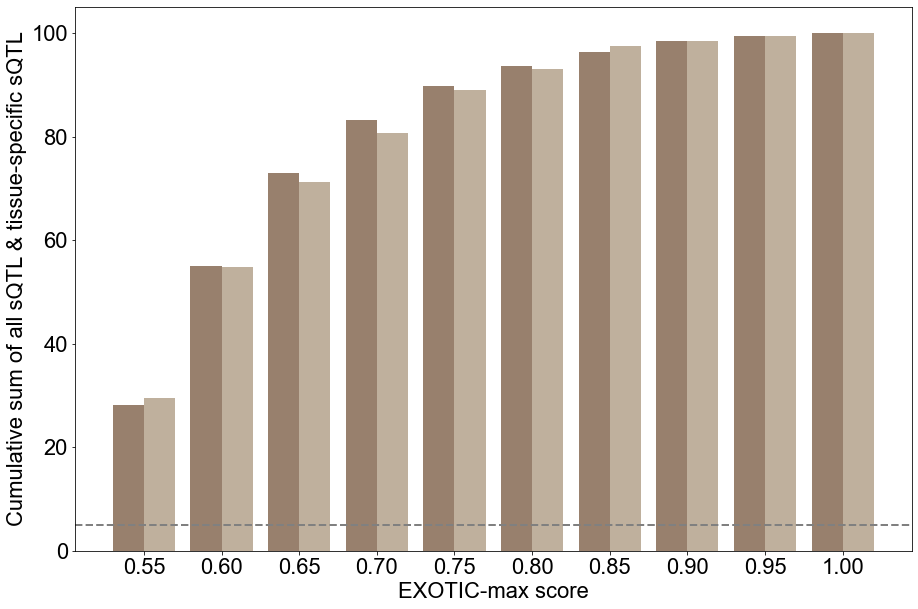

In [73]:
f, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})

concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC_modified-up_Rdata.xlsx')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_total", alpha=0.8, align='edge', width=-0.02, color='#7E6148FF')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_tissues", alpha=0.8, align='edge', width=0.02, color='#B09C85FF')
plt.axhline(y=5, lw=2, color='grey', ls='--')
locs, labels = plt.xticks()
plt.xlabel('EXOTIC-max score')
plt.ylabel('Cumulative sum of all sQTL & tissue-specific sQTL')
ax.set_xticks(np.arange(min(concat_final.EXOTIC_bin_start), max(concat_final.EXOTIC_bin_start)+0.05, 0.05))


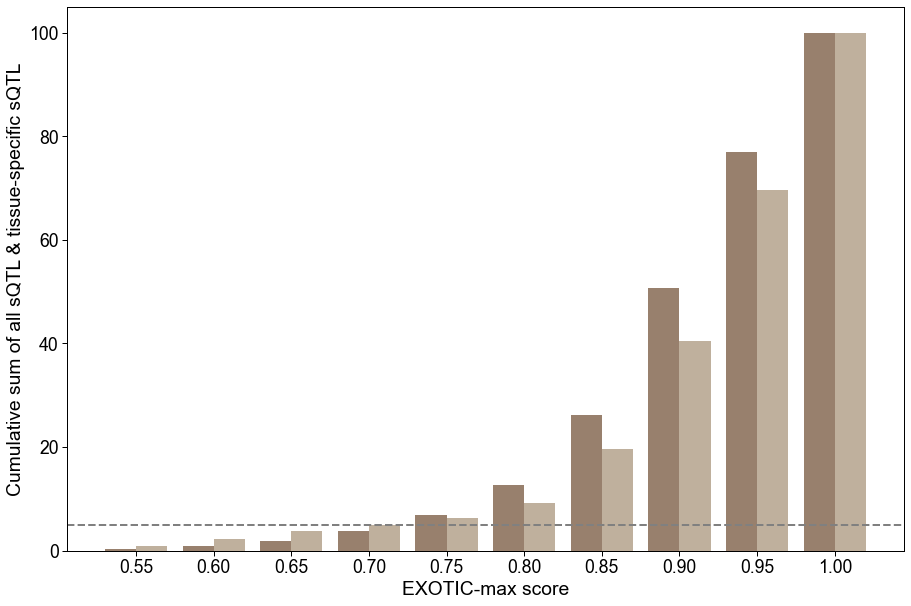

In [262]:
f, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})

concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-max_Rdata.xlsx')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_total", alpha=0.8, align='edge', width=-0.02, color='#7E6148FF')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_tissues", alpha=0.8, align='edge', width=0.02, color='#B09C85FF')
plt.axhline(y=5, lw=2, color='grey', ls='--')
locs, labels = plt.xticks()
plt.xlabel('EXOTIC-max score')
plt.ylabel('Cumulative sum of all sQTL & tissue-specific sQTL')
ax.set_xticks(np.arange(min(concat_final.EXOTIC_bin_start), max(concat_final.EXOTIC_bin_start)+0.05, 0.05))


## Fig X - Cumsum all sQTL & TS for EXOTIC-min

In [76]:
concat_final

,EXOTIC_bins_down,snpId,symbol,Ratio_sQTL,snpId_total,symbol.1,Ratio_sQTL_total,Ratio,Enrichment,EXOTIC_bin_start,Cumsum_total,Cumsum_tissues
0,0.5 - 0.55,1830,95,19.263158,38635,1061,36.413761,0.047366,0.529008,0.55,20.723151,22.160329
1,0.55 - 0.6,2354,126,18.682540,53145,1351,39.337528,0.044294,0.474929,0.60,49.229218,50.666021
2,0.6 - 0.65,2070,83,24.939759,30369,820,37.035366,0.068162,0.673404,0.65,65.518629,75.732623
3,0.65 - 0.7,898,50,17.960000,19679,518,37.990347,0.045632,0.472752,0.70,76.074107,86.606927
4,0.7 - 0.75,505,21,24.047619,14330,341,42.023460,0.035241,0.572243,0.75,83.760473,92.722209
5,0.75 - 0.8,219,11,19.909091,11592,239,48.502092,0.018892,0.410479,0.80,89.978223,95.374183
6,0.8 - 0.85,269,7,38.428571,6240,148,42.162162,0.043109,0.911447,0.85,93.325252,98.631630
7,0.85 - 0.9,93,5,18.600000,4480,115,38.956522,0.020759,0.477455,0.90,95.728247,99.757811
8,0.9 - 0.95,19,3,6.333333,4679,91,51.417582,0.004061,0.123174,0.95,98.237982,99.987891
9,0.95 - 1.0,1,1,1.000000,3285,72,45.625000,0.000304,0.021918,1.00,100.000000,100.000000


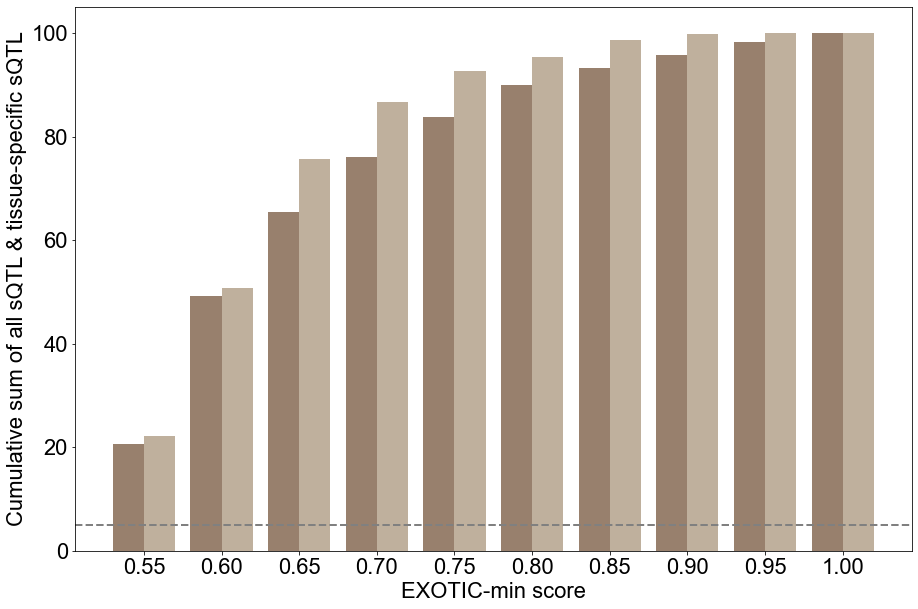

In [75]:
f, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})

concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC_modified-down_Rdata.xlsx')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_total", alpha=0.8, align='edge', width=-0.02, color='#7E6148FF')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_tissues", alpha=0.8, align='edge', width=0.02, color='#B09C85FF')
plt.axhline(y=5, lw=2, color='grey', ls='--')
locs, labels = plt.xticks()
plt.xlabel('EXOTIC-min score')
plt.ylabel('Cumulative sum of all sQTL & tissue-specific sQTL')
ax.set_xticks(np.arange(min(concat_final.EXOTIC_bin_start), max(concat_final.EXOTIC_bin_start)+0.05, 0.05))


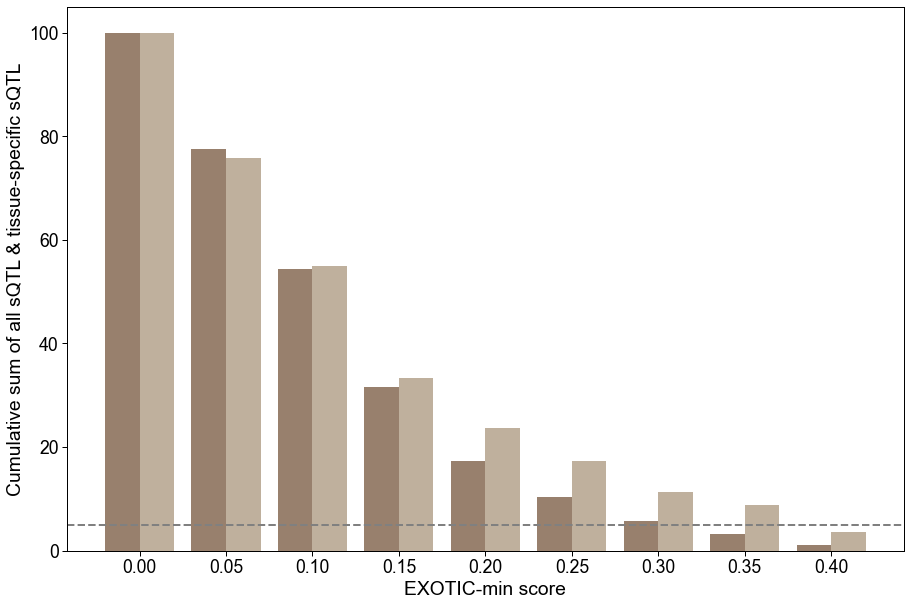

In [261]:
f, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})

concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-min_Rdata.xlsx')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_total", alpha=0.8, align='edge', width=-0.02, color='#7E6148FF')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_tissues", alpha=0.8, align='edge', width=0.02, color='#B09C85FF')
plt.axhline(y=5, lw=2, color='grey', ls='--')
locs, labels = plt.xticks()
plt.xlabel('EXOTIC-min score')
plt.ylabel('Cumulative sum of all sQTL & tissue-specific sQTL')
ax.set_xticks(np.arange(min(concat_final.EXOTIC_bin_start), max(concat_final.EXOTIC_bin_start)+0.05, 0.05))


## Fig X - Nb sQTL & TS for EXOTIC-min

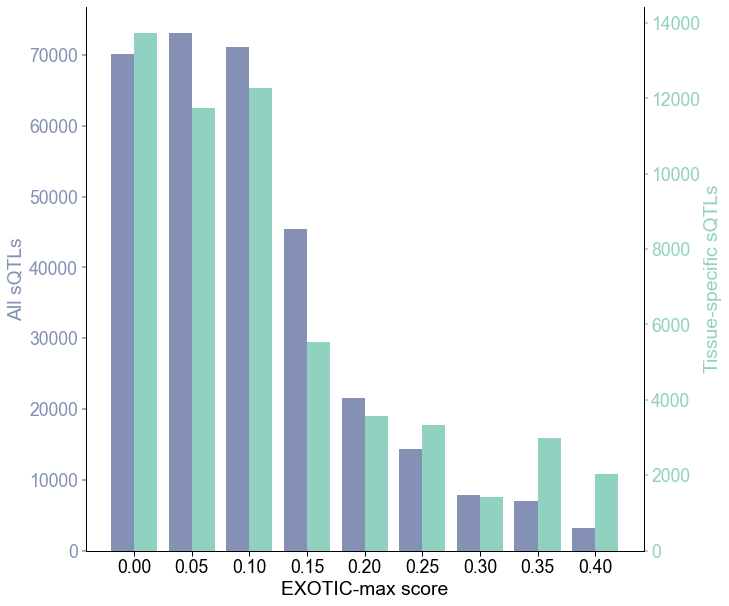

In [249]:
concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-min_Rdata.xlsx')

sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(figsize=(10,10))
data = concat_final.reset_index()
ax1_ = ax.bar(data.EXOTIC_bin_start.values, data.snpId_total.values,
#        yerr=error,
       align='edge',
       
       color='#8491B4FF',
       width=-0.020
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(data.EXOTIC_bin_start.values, data.snpId.values, color='#91D1C2FF', align='edge', width=0.02)
ax.yaxis.label.set_color('#8491B4FF')
ax2.yaxis.label.set_color('#91D1C2FF')

# ax.set_xticklabels(['0', '0.05', '0.1'])
ax.set_xticks(np.arange(min(data.EXOTIC_bin_start), max(data.EXOTIC_bin_start)+0.05, 0.05))

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#8491B4FF', **tkw)
ax2.tick_params(axis='y', colors='#91D1C2FF', **tkw)
ax.set_ylabel('All sQTLs')
ax.set_xlabel('EXOTIC-max score')
ax2.set_ylabel('Tissue-specific sQTLs')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)


## Fig X - Nb sQTL & TS for EXOTIC-min

In [13]:
pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-max_Rdata.xlsx')

,EXOTIC_bins_max,snpId,symbol,Ratio_sQTL,snpId_total,symbol.1,Ratio_sQTL_total,Ratio,Enrichment,EXOTIC_bin_start,Cumsum_total,Cumsum_tissues
0,0.53 - 0.54,273,8,34.125000,487,10,48.700000,0.560575,0.700719,0.54,0.122124,0.377944
1,0.54 - 0.55,269,4,67.250000,295,6,49.166667,0.911864,1.367797,0.55,0.196101,0.750350
2,0.55 - 0.56,209,7,29.857143,255,12,21.250000,0.819608,1.405042,0.56,0.260047,1.039691
3,0.56 - 0.57,202,6,33.666667,317,10,31.700000,0.637224,1.062040,0.57,0.339541,1.319342
4,0.57 - 0.58,107,7,15.285714,317,10,31.700000,0.337539,0.482199,0.58,0.419034,1.467473
5,0.58 - 0.59,180,5,36.000000,326,11,29.636364,0.552147,1.214724,0.59,0.500785,1.716667
6,0.59 - 0.6,77,3,25.666667,786,16,49.125000,0.097964,0.522477,0.60,0.697889,1.823266
7,0.6 - 0.61,58,4,14.500000,724,14,51.714286,0.080110,0.280387,0.61,0.879446,1.903562
8,0.61 - 0.62,258,3,86.000000,411,11,37.363636,0.627737,2.301703,0.62,0.982511,2.260740
9,0.62 - 0.63,153,5,30.600000,462,17,27.176471,0.331169,1.125974,0.63,1.098366,2.472554


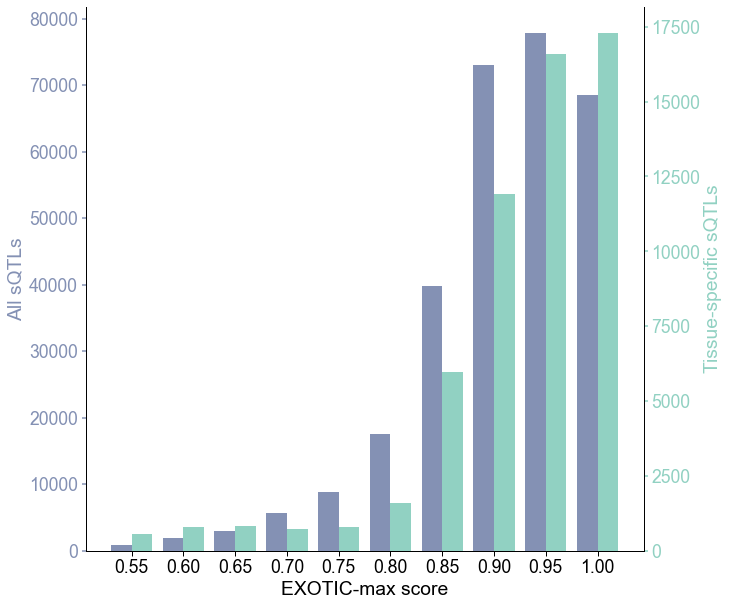

In [254]:
concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-max_Rdata.xlsx')

sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(figsize=(10,10))
data = concat_final.reset_index()
ax1_ = ax.bar(data.EXOTIC_bin_start.values, data.snpId_total.values,
#        yerr=error,
       align='edge',
       
       color='#8491B4FF',
       width=-0.020
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(data.EXOTIC_bin_start.values, data.snpId.values, color='#91D1C2FF', align='edge', width=0.02)
ax.yaxis.label.set_color('#8491B4FF')
ax2.yaxis.label.set_color('#91D1C2FF')

ax.set_xticks(np.arange(min(data.EXOTIC_bin_start), max(data.EXOTIC_bin_start)+0.05, 0.05))


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#8491B4FF', **tkw)
ax2.tick_params(axis='y', colors='#91D1C2FF', **tkw)
ax.set_ylabel('All sQTLs')
ax.set_xlabel('EXOTIC-max score')
ax2.set_ylabel('Tissue-specific sQTLs')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
# plt.title('Up')

## Data Fig X - Compute cutoff sQTL for EXOTIC-min & max

In [27]:
for min_max in ['up', 'down']:
    print(min_max)
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format(min_max))
    cutoff_sqtl = merge_exotic_sqtl[['EXOTIC_{}'.format(min_max), 'Tissue']].groupby('Tissue').max()
    cutoff_sqtl.to_excel('/gstock/EXOTIC/data/QTL/sQTL_cutoff_EXOTIC_modified_{}_Rdata.xlsx'.format(min_max))

up
down


# EXOTIC & pext distribution

## Compute stuff

In [224]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_min', 'EXOTIC_tissues_corrected_min', 'EXOTIC_pext_associated_min', 'EXOTIC_max', 'EXOTIC_tissues_corrected_max', 'EXOTIC_pext_associated_max']]
test['pext_EXOTIC_min_median'] = test['EXOTIC_pext_associated_min'].apply(np.median)
test['pext_EXOTIC_max_median'] = test['EXOTIC_pext_associated_max'].apply(np.median)
test['pext_min_max_diff'] = test['pext_EXOTIC_max_median'] - test['pext_EXOTIC_min_median']
test

,symbol,MAP,EXOTIC_min,EXOTIC_tissues_corrected_min,EXOTIC_pext_associated_min,EXOTIC_max,EXOTIC_tissues_corrected_max,EXOTIC_pext_associated_max,pext_EXOTIC_min_median,pext_EXOTIC_max_median,pext_min_max_diff
0,A2ML1,A2ML1_8975248-8975309,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],0.731334,"[Adipose - Subcutaneous, Adipose - Visceral (O...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.17518,1.00000,0.82482
1,A2ML1,A2ML1_8975778-8975961,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],0.731334,"[Adipose - Subcutaneous, Adipose - Visceral (O...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.17518,1.00000,0.82482
2,A2ML1,A2ML1_8976316-8976478,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],0.731334,"[Adipose - Subcutaneous, Adipose - Visceral (O...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.17518,1.00000,0.82482
3,A2ML1,A2ML1_8982323-8982375,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],0.731334,"[Adipose - Subcutaneous, Adipose - Visceral (O...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.17518,1.00000,0.82482
4,A2ML1,A2ML1_8987258-8987278,0.153430,[Brain - Cerebellar Hemisphere],[0.17518],0.731334,"[Adipose - Subcutaneous, Adipose - Visceral (O...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.17518,1.00000,0.82482
...,...,...,...,...,...,...,...,...,...,...,...
27533,ZXDC,ZXDC_126158475-126158570,0.150855,[Brain - Nucleus accumbens (basal ganglia)],[0.11398],0.912582,[Muscle - Skeletal],[0.34009],0.11398,0.34009,0.22611
27534,ZXDC,ZXDC_126160608-126160789,0.150855,[Brain - Nucleus accumbens (basal ganglia)],[0.11398],0.912582,[Muscle - Skeletal],[0.34009],0.11398,0.34009,0.22611
27535,ZXDC,ZXDC_126178496-126178580,0.150855,[Brain - Nucleus accumbens (basal ganglia)],[0.11398],0.912582,[Muscle - Skeletal],[0.34009],0.11398,0.34009,0.22611
27536,ZXDC,ZXDC_126180378-126181063,0.139039,[Whole Blood],[0.20951999999999998],0.910061,[Artery - Tibial],[0.52384],0.20952,0.52384,0.31432


## Fig X - Diff EXOTIC-min & max 

[0.7794307601197143]


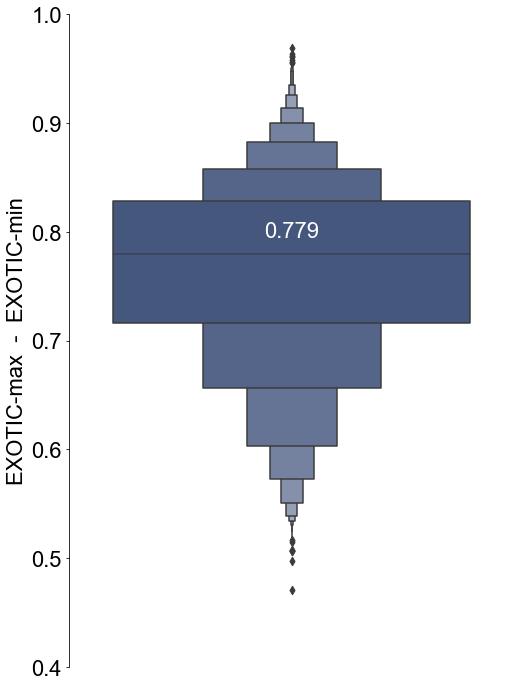

In [221]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_min', 'EXOTIC_tissues_corrected_min', 'EXOTIC_pext_associated_min', 'EXOTIC_max', 'EXOTIC_tissues_corrected_max', 'EXOTIC_pext_associated_max']]
test['EXOTIC_min_max_diff'] = test['EXOTIC_max'] - test['EXOTIC_min']
plt.figure(figsize=(8,12))
b = sns.boxenplot(data=test, y='EXOTIC_min_max_diff', color='#3C5488FF')
plt.ylabel('EXOTIC-max  -  EXOTIC-min')
b.spines['right'].set_linewidth(0)
b.spines['top'].set_linewidth(0)
b.spines['bottom'].set_linewidth(0)
# b.a.set_xticks([])
b.xaxis.set_ticks_position('none') 
plt.ylim(0.4,1)

data = test
x, y = 'MAP', 'EXOTIC_min_max_diff'
medians = [data[y].median()]
vertical_offset = data[y].median() * 0.02 # offset from median for display
print(medians)

for j, xtick in enumerate(b.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 3), 
            horizontalalignment='center',size='medium',color=color,weight='semibold')


## Fig X - Diff pext EXOTIC-min & max 

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


[0.33539]


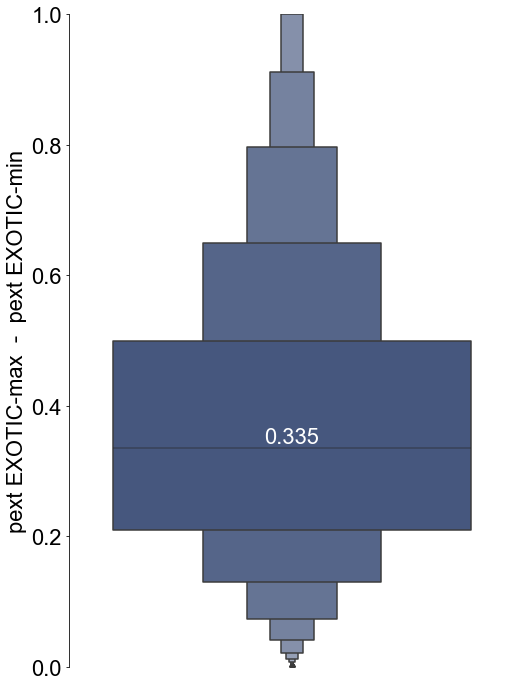

In [228]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_min', 'EXOTIC_tissues_corrected_min', 'EXOTIC_pext_associated_min', 'EXOTIC_max', 'EXOTIC_tissues_corrected_max', 'EXOTIC_pext_associated_max']]
test['pext_EXOTIC_min_median'] = test['EXOTIC_pext_associated_min'].apply(np.median)
test['pext_EXOTIC_max_median'] = test['EXOTIC_pext_associated_max'].apply(np.median)
test['pext_min_max_diff'] = test['pext_EXOTIC_max_median'] - test['pext_EXOTIC_min_median']

plt.figure(figsize=(8,12))
b = sns.boxenplot(data=test, y='pext_min_max_diff', color='#3C5488FF')
plt.ylabel('pext EXOTIC-max  -  pext EXOTIC-min')
b.spines['right'].set_linewidth(0)
b.spines['top'].set_linewidth(0)
b.spines['bottom'].set_linewidth(0)
# b.a.set_xticks([])
b.xaxis.set_ticks_position('none') 
plt.ylim(0,1)

data = test
x, y = 'MAP', 'pext_min_max_diff'
medians = [data[y].median()]
vertical_offset = data[y].median() * 0.02 # offset from median for display
print(medians)

for j, xtick in enumerate(b.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 3), 
            horizontalalignment='center',size='medium',color=color,weight='semibold')


## Fig X - Distribution pext + EXOTIC-min

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


[0.09737365590096414, 0.27329000000000003]


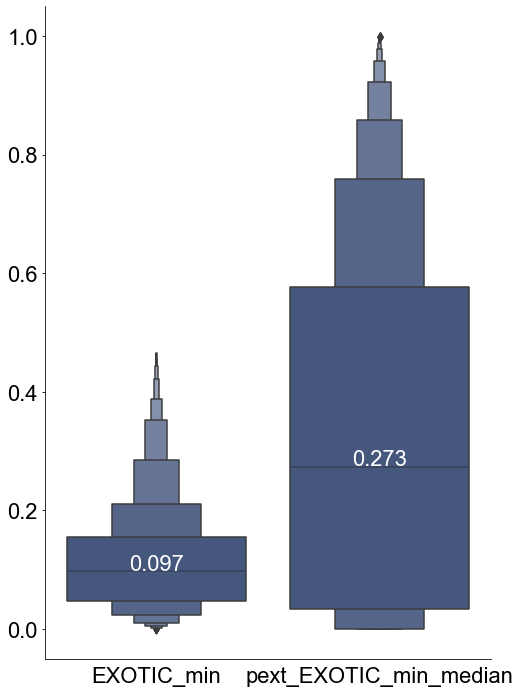

In [239]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_min', 'EXOTIC_tissues_corrected_min', 'EXOTIC_pext_associated_min']]
test['pext_EXOTIC_min_median'] = test['EXOTIC_pext_associated_min'].apply(np.median)
test = test[['MAP', 'EXOTIC_min', 'pext_EXOTIC_min_median',]].melt(id_vars='MAP', value_vars=['EXOTIC_min', 'pext_EXOTIC_min_median'])

f, ax=  plt.subplots(figsize=(8,12))
b = sns.boxenplot(data=test, x='variable', y='value', color='#3C5488FF')
# plt.ylabel('pext EXOTIC-max  -  pext EXOTIC-min')
plt.xlabel('')
plt.ylabel('')
b.spines['right'].set_linewidth(0)
b.spines['top'].set_linewidth(0)
# b.spines['bottom'].set_linewidth(0)
# b.a.set_xticks([])
b.xaxis.set_ticks_position('none') 
# plt.ylim(0,1)

data = test
x, y = 'MAP', 'value'
medians = data.groupby('variable')[y].median().values.tolist()
vertical_offset = data[y].median() * 0.02 # offset from median for display
print(medians)

for j, xtick in enumerate(b.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 3), 
            horizontalalignment='center',size='medium',color=color,weight='semibold')


## Fig X - Distribution pext + EXOTIC-max

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


[0.8993509559734316, 0.7934100000000001]


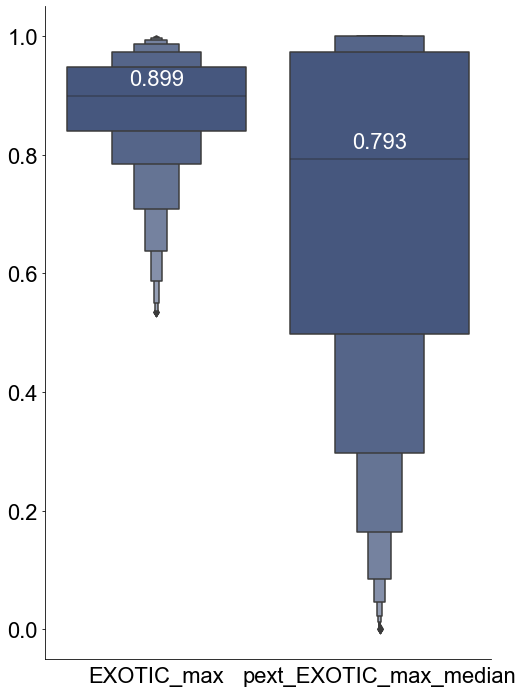

In [240]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_max', 'EXOTIC_tissues_corrected_max', 'EXOTIC_pext_associated_max']]
test['pext_EXOTIC_max_median'] = test['EXOTIC_pext_associated_max'].apply(np.median)
test = test[['MAP', 'EXOTIC_max', 'pext_EXOTIC_max_median',]].melt(id_vars='MAP', value_vars=['EXOTIC_max', 'pext_EXOTIC_max_median'])

f, ax=  plt.subplots(figsize=(8,12))
b = sns.boxenplot(data=test, x='variable', y='value', color='#3C5488FF')
# plt.ylabel('pext EXOTIC-max  -  pext EXOTIC-min')
plt.xlabel('')
plt.ylabel('')
b.spines['right'].set_linewidth(0)
b.spines['top'].set_linewidth(0)
# b.spines['bottom'].set_linewidth(0)
# b.a.set_xticks([])
b.xaxis.set_ticks_position('none') 
# plt.ylim(0,1)

data = test
x, y = 'MAP', 'value'
medians = data.groupby('variable')[y].median().values.tolist()
vertical_offset = data[y].median() * 0.02 # offset from median for display
print(medians)

for j, xtick in enumerate(b.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 3), 
            horizontalalignment='center',size='medium',color=color,weight='semibold')
